In [2]:
!conda env list

# conda environments:
#
base                  *  C:\Users\vaisa\anaconda3
case_study               C:\Users\vaisa\anaconda3\envs\case_study
myenv                    C:\Users\vaisa\anaconda3\envs\myenv
py39                     C:\Users\vaisa\anaconda3\envs\py39
rstudio                  C:\Users\vaisa\anaconda3\envs\rstudio



In [1]:
!conda activate case_study

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Reading the data and creating a dataframe.

In [8]:
data = pd.read_excel('data/case_study.xlsx')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### Some information about the dataset

In [9]:
data.shape

(319795, 18)

In [10]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [11]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [12]:
data.describe(include=['O'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### EDA and some plots

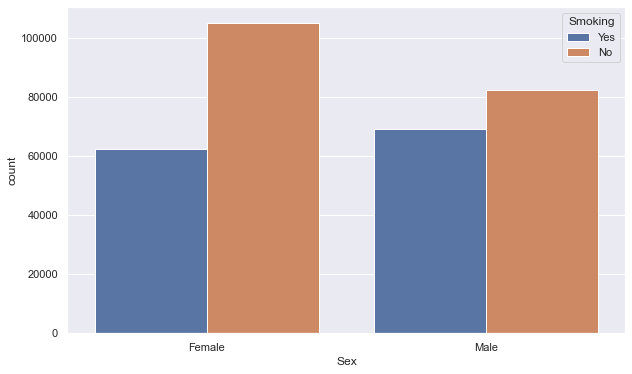

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Sex',hue = 'Smoking')
plt.show()

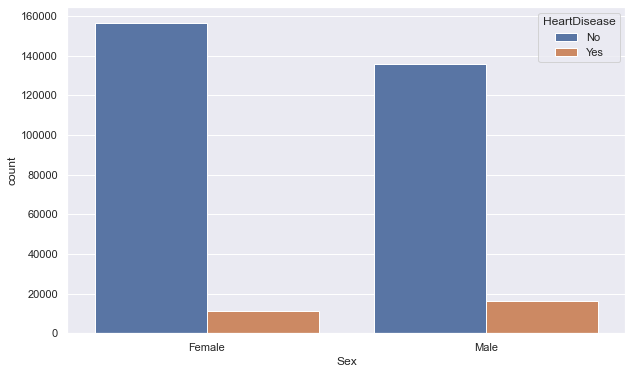

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Sex',hue = 'HeartDisease')
plt.show()

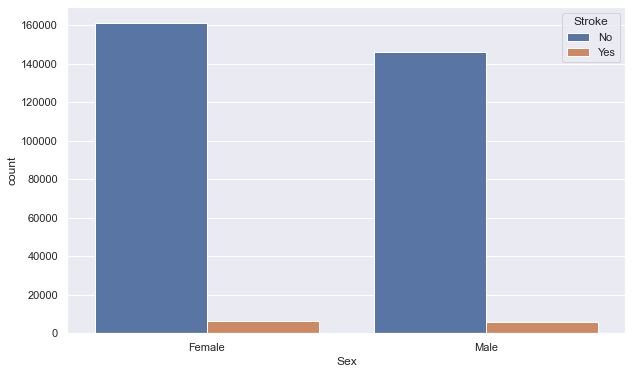

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Sex',hue = 'Stroke')
plt.show()

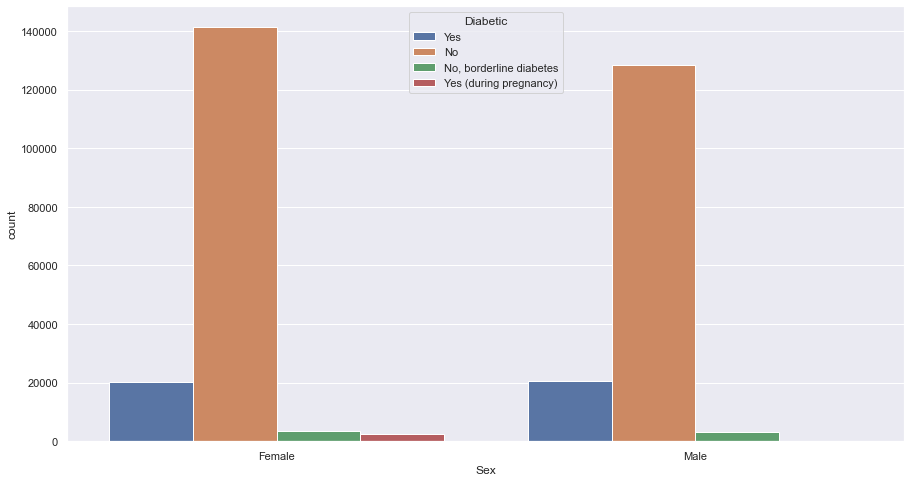

In [16]:
plt.figure(figsize = (15,8))
sns.countplot(data = data, x = 'Sex',hue = 'Diabetic')
plt.show()

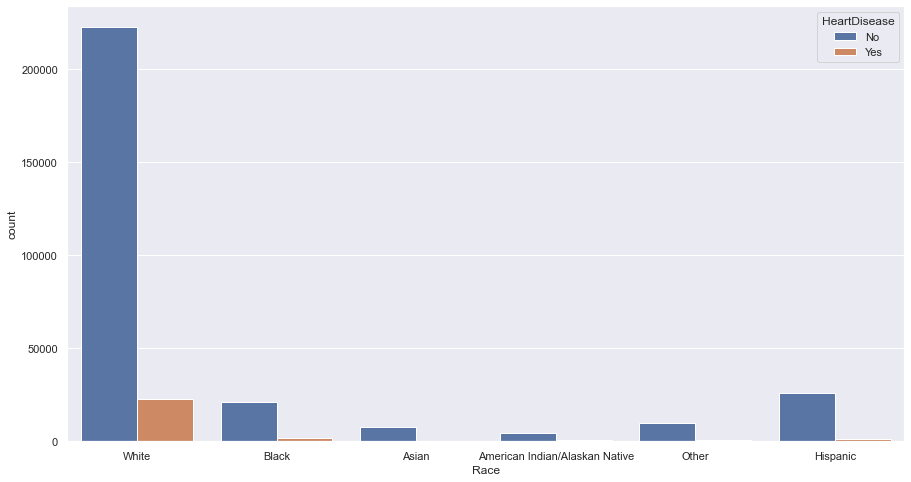

In [17]:
plt.figure(figsize = (15,8))
sns.countplot(data = data, x = 'Race',hue = 'HeartDisease')
plt.show()

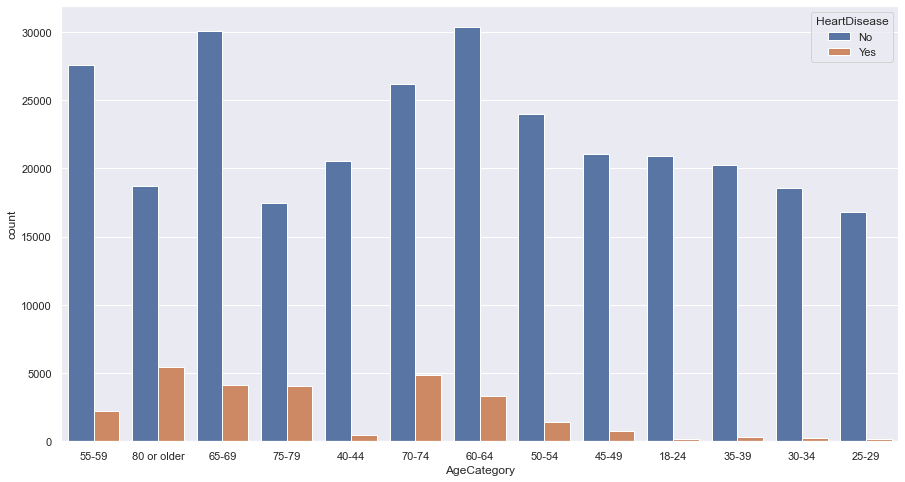

In [18]:
plt.figure(figsize = (15,8))
sns.countplot(data = data, x = 'AgeCategory',hue = 'HeartDisease')
plt.show()

Highly imbalanced data in most of the columns which can be inferred from the above analysis.Can use random undersampling, oversampling or a combination of both like SMOTETOMEK to take care of class imbalance after doing the eda.

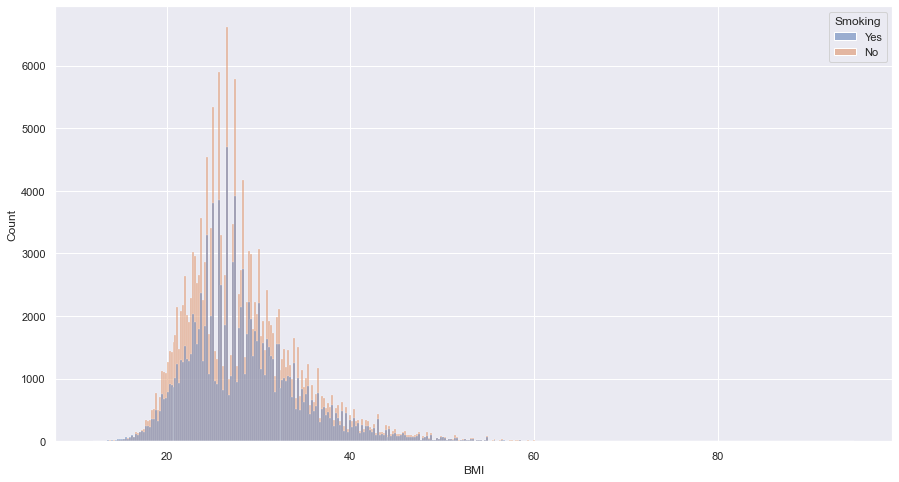

In [101]:
plt.figure(figsize = (15,8))
sns.histplot(data =data, x = 'BMI', hue = 'Smoking')
plt.show()

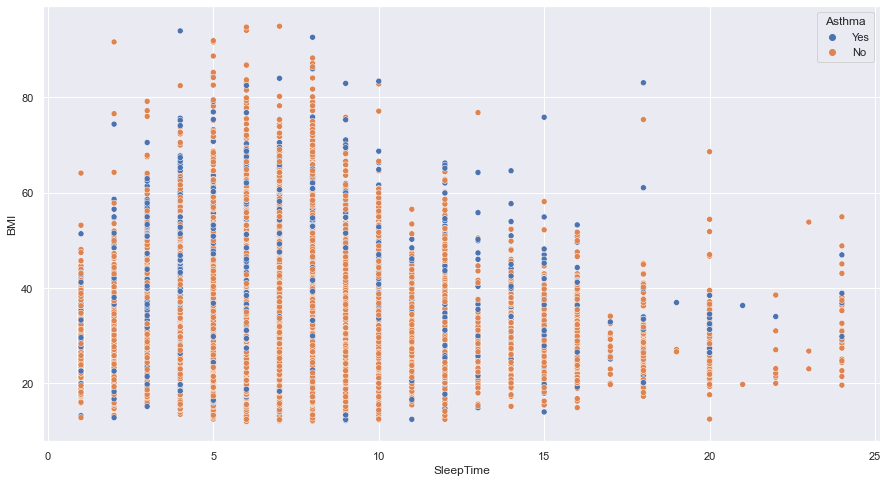

In [102]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = data, x = 'SleepTime', y = 'BMI', hue = 'Asthma')
plt.show()

### Checking value counts of each class in all categorical column.

Number of Categorical variables: 14

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


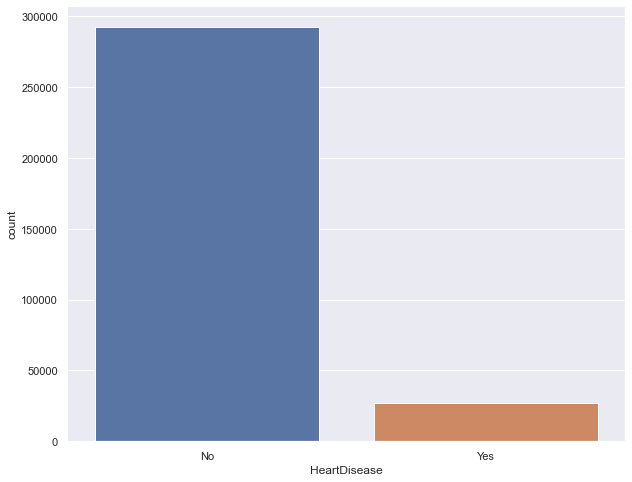


No     187887
Yes    131908
Name: Smoking, dtype: int64


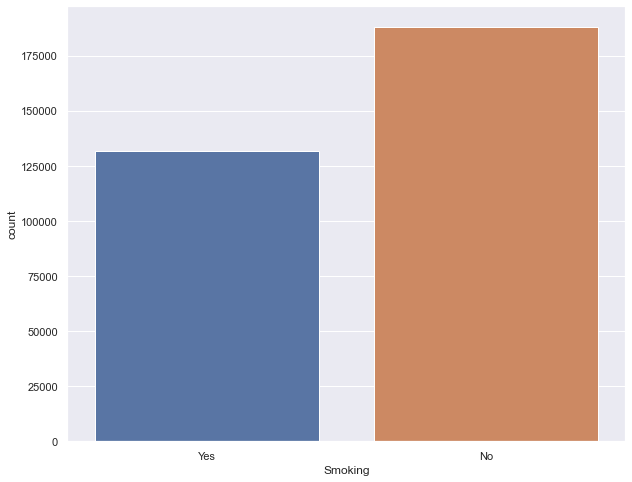


No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


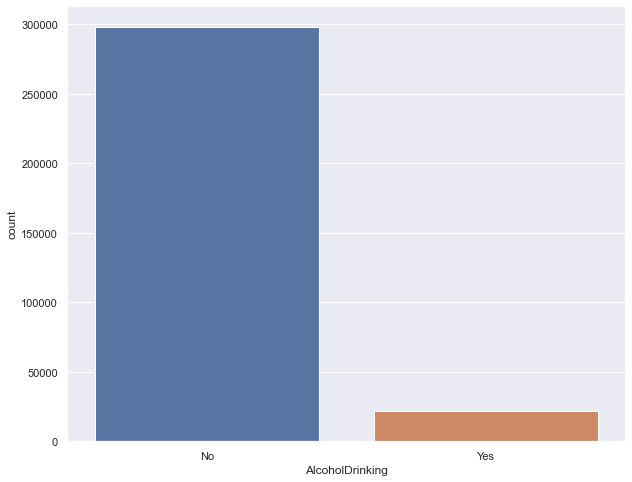


No     307726
Yes     12069
Name: Stroke, dtype: int64


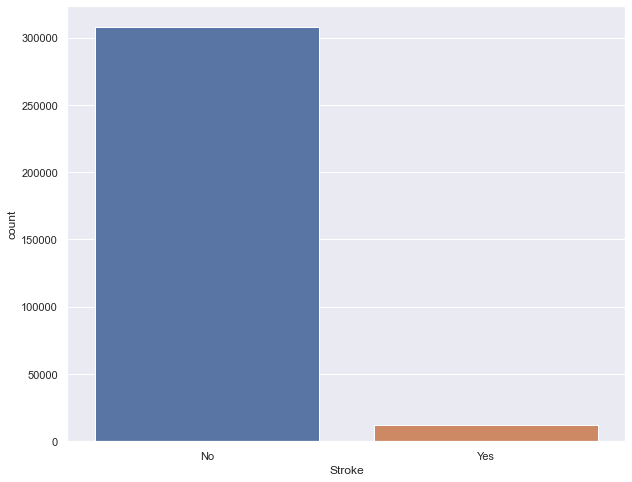


No     275385
Yes     44410
Name: DiffWalking, dtype: int64


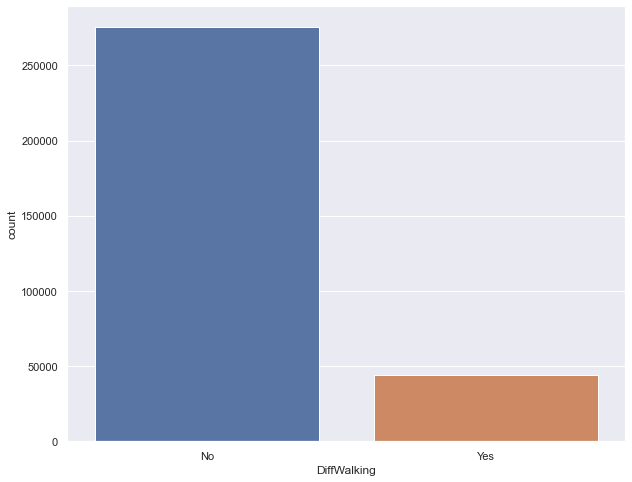


Female    167805
Male      151990
Name: Sex, dtype: int64


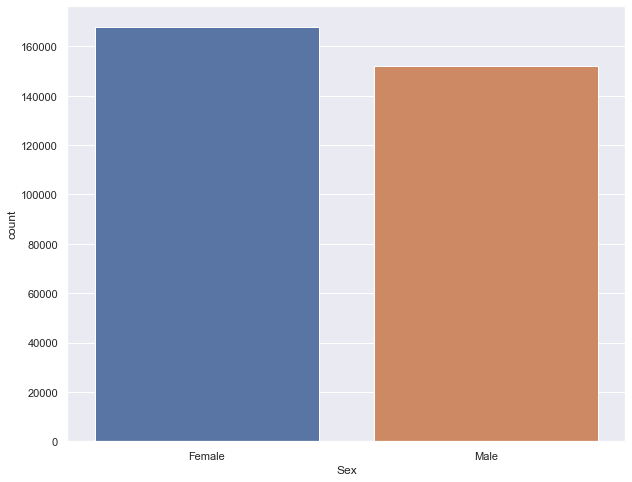


65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


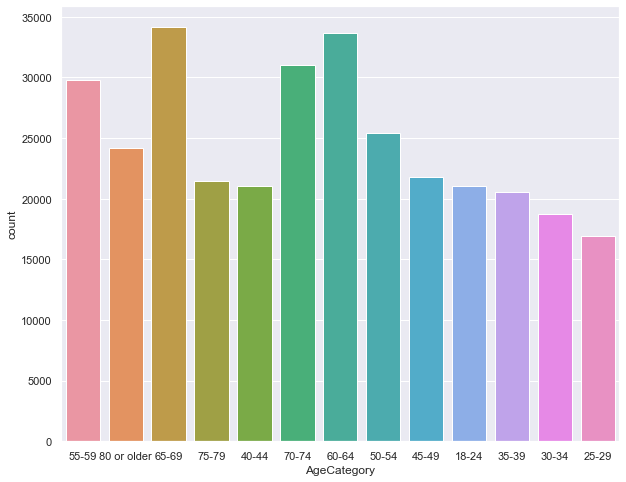


White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


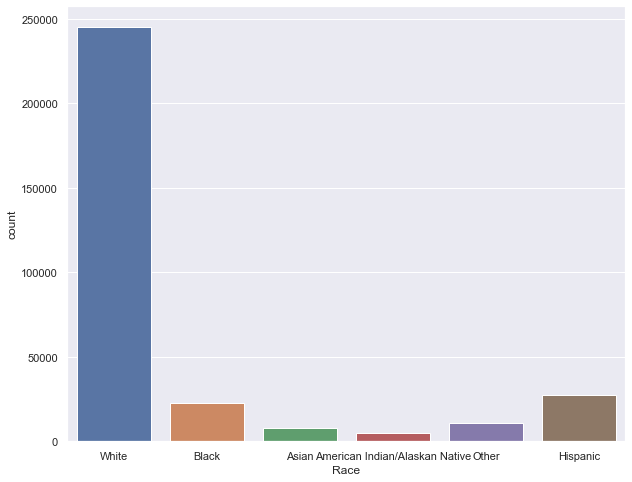


No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


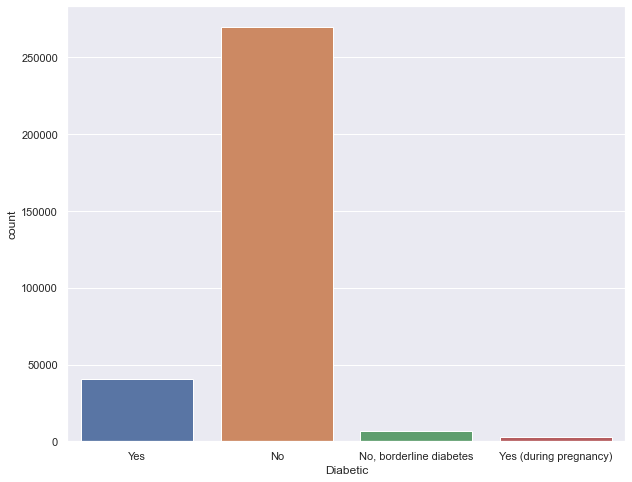


Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


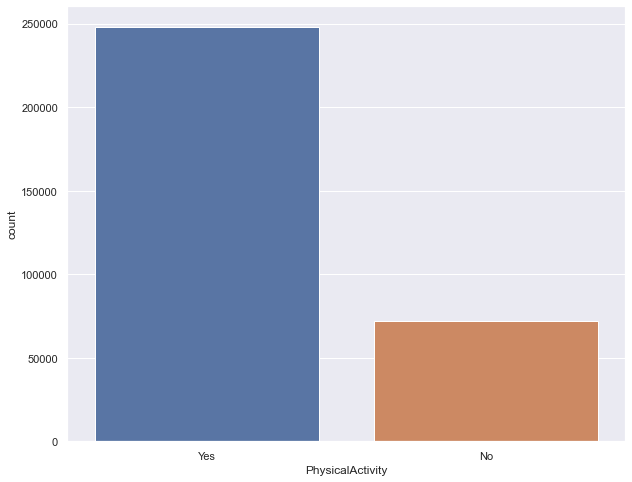


Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


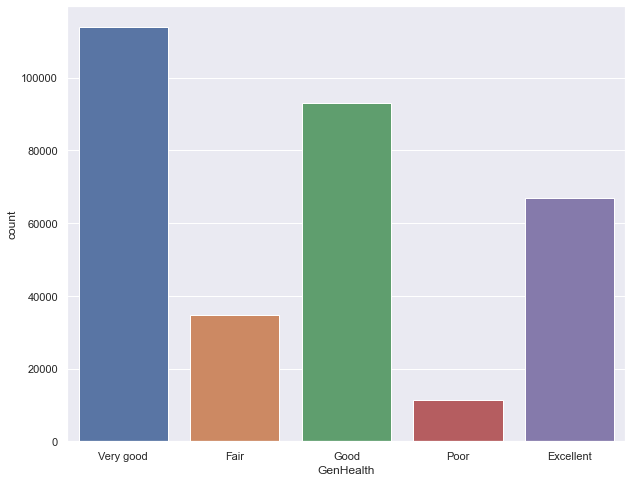


No     276923
Yes     42872
Name: Asthma, dtype: int64


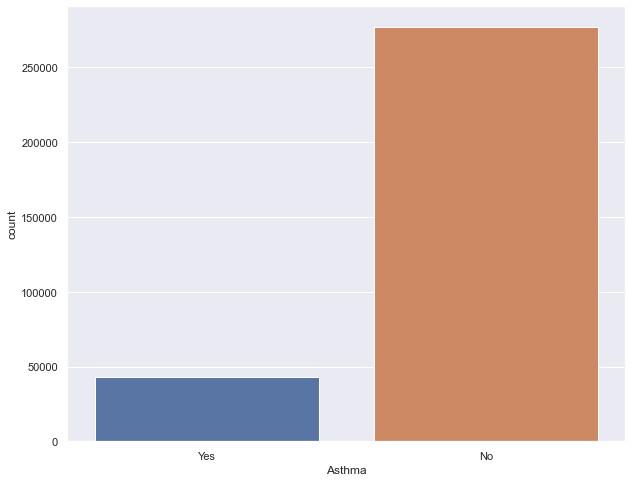


No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


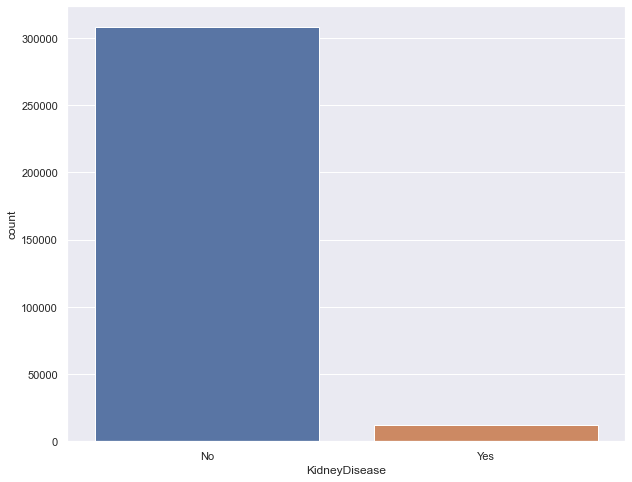


No     289976
Yes     29819
Name: SkinCancer, dtype: int64


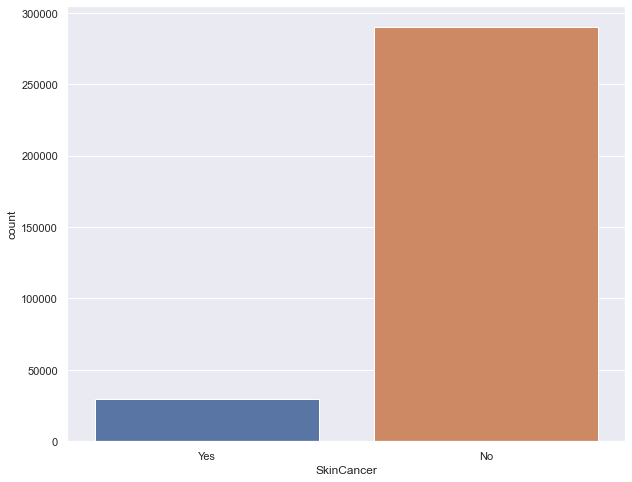

In [19]:
cat_var = [col for col in data if data[col].dtypes=="object"]
print("Number of Categorical variables:",len(cat_var))
print()
for col in cat_var:
    print(data[col].value_counts())
    plt.figure(figsize = (10,8))
    sns.countplot(data[col])
    plt.show()
    print()

### Checking the same in numerical columns

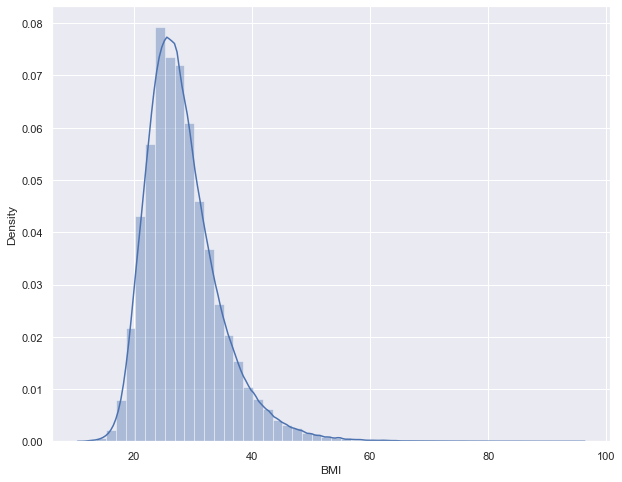

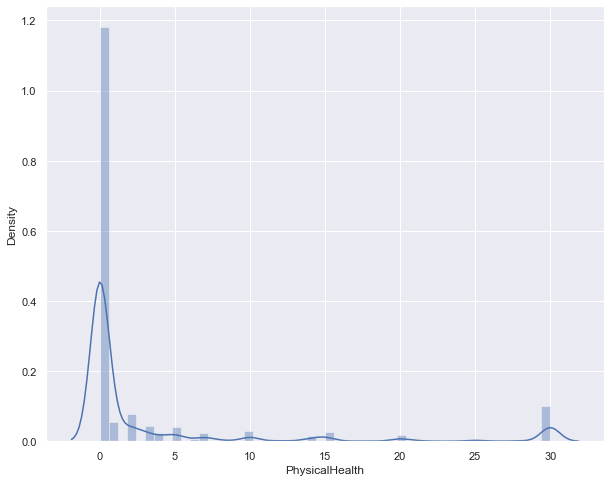

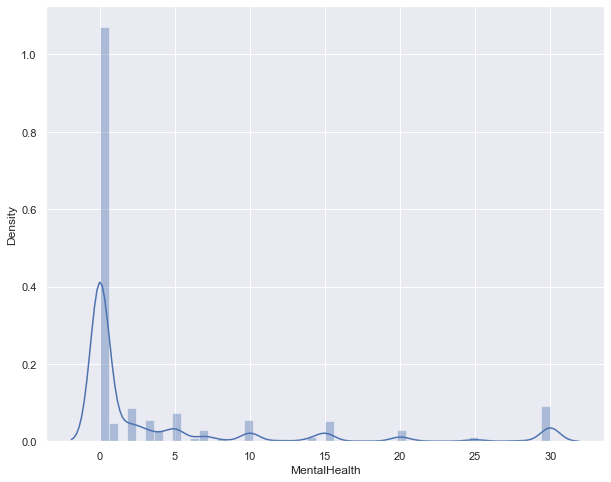

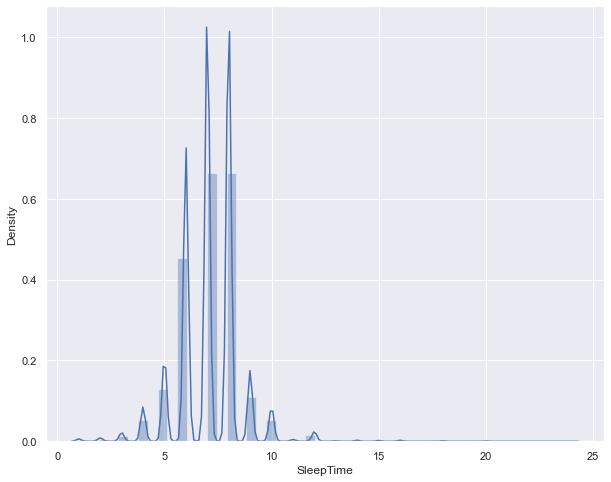

In [20]:
num_var = [col for col in data if (data[col].dtypes=="int64") or (data[col].dtypes=="float64")]
for col in num_var:
    #print(data[col].value_counts())
    plt.figure(figsize = (10,8))
    sns.distplot(data[col])
    plt.show()
    print()
# print(len(num_var))
# print(num_var)

### Checking value_counts in percentage

In [21]:
for col in cat_var:
    print(data[col].value_counts(normalize=True).mul(100).round(1))
    print()  

No     91.4
Yes     8.6
Name: HeartDisease, dtype: float64

No     58.8
Yes    41.2
Name: Smoking, dtype: float64

No     93.2
Yes     6.8
Name: AlcoholDrinking, dtype: float64

No     96.2
Yes     3.8
Name: Stroke, dtype: float64

No     86.1
Yes    13.9
Name: DiffWalking, dtype: float64

Female    52.5
Male      47.5
Name: Sex, dtype: float64

65-69          10.7
60-64          10.5
70-74           9.7
55-59           9.3
50-54           7.9
80 or older     7.6
45-49           6.8
75-79           6.7
18-24           6.6
40-44           6.6
35-39           6.4
30-34           5.9
25-29           5.3
Name: AgeCategory, dtype: float64

White                             76.7
Hispanic                           8.6
Black                              7.2
Other                              3.4
Asian                              2.5
American Indian/Alaskan Native     1.6
Name: Race, dtype: float64

No                         84.3
Yes                        12.8
No, borderline diabetes     2.1

### Filtering highly imbalanced columns and creating a list.

In [22]:
highly_imbalanced_cat_columns = [col for col in cat_var if data[col].value_counts(normalize=True).mul(100).round(1)[1] < 10]
print(highly_imbalanced_cat_columns)

['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Race', 'KidneyDisease', 'SkinCancer']


In [99]:
data.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [100]:
data.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

### Creating age column from the age_category column

In [23]:
data['AgeCategory_max'] = data['AgeCategory'].apply(lambda x: 90 if x == '80 or older' else x[-2:])
data['AgeCategory_min'] = data['AgeCategory'].apply(lambda x: 80 if x == '80 or older' else x[:2])
data[['AgeCategory_min','AgeCategory_max']] = data[['AgeCategory_min','AgeCategory_max']].astype('int64')
data['Age'] = (data['AgeCategory_min'] + data['AgeCategory_max'])/2
data = data.drop(['AgeCategory','AgeCategory_min','AgeCategory_max'] , axis = 1)

In [24]:
data.Age.describe()

count    319795.000000
mean         54.733392
std          18.306486
min          21.000000
25%          42.000000
50%          57.000000
75%          67.000000
max          85.000000
Name: Age, dtype: float64

In [25]:
num_var_before_encoding = [col for col in data if (data[col].dtypes=="int64") or (data[col].dtypes=="float64")]
num_var_before_encoding

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']

In [26]:
data[num_var_before_encoding].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Age
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,54.733392
std,6.356100,7.95085,7.955235,1.436007,18.306486
min,12.020000,0.00000,0.000000,1.000000,21.000000
25%,24.030000,0.00000,0.000000,6.000000,42.000000
50%,27.340000,0.00000,0.000000,7.000000,57.000000
75%,31.420000,2.00000,3.000000,8.000000,67.000000
max,94.850000,30.00000,30.000000,24.000000,85.000000


In [27]:
cat_var = [col for col in data if data[col].dtypes=="object"]
print(len(cat_var))
print(cat_var)

13
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


### Checking for outliers in numerical columns

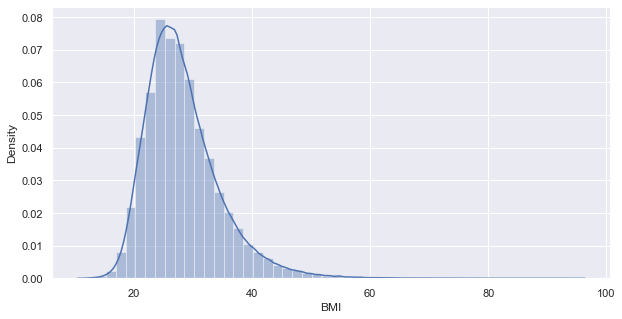

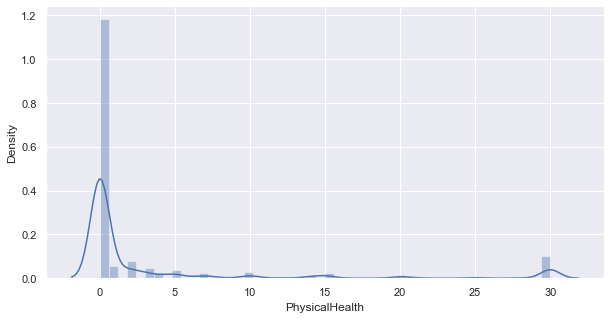

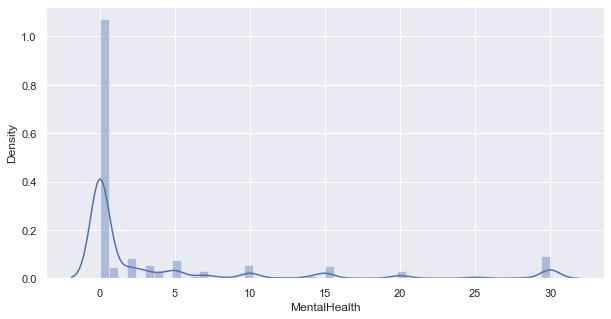

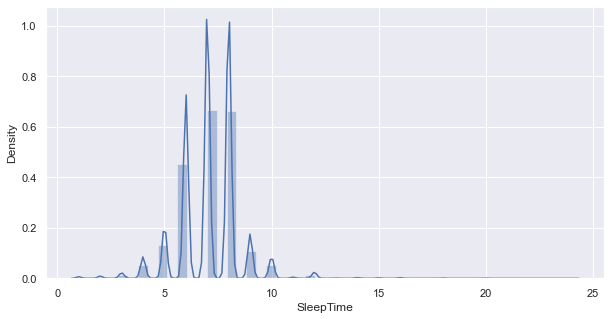

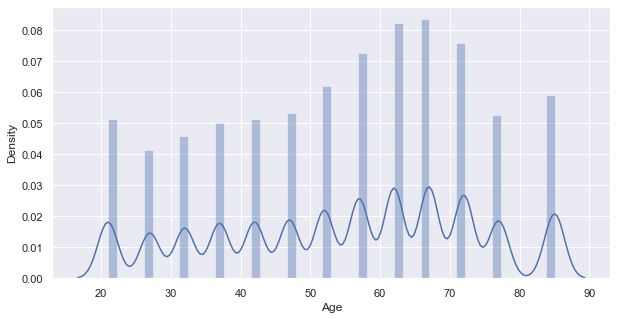

In [28]:
for col in num_var_before_encoding:
    plt.figure(figsize = (10,5))
    sns.distplot(data[col])
    plt.show()

### Boxplot to check outliers-

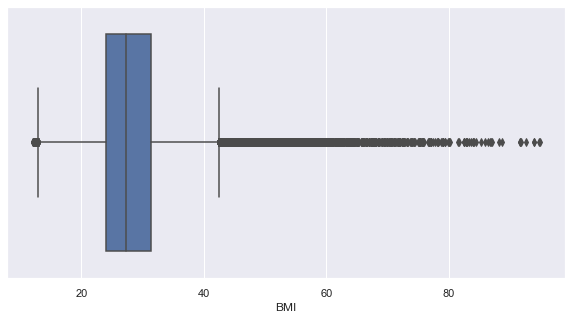

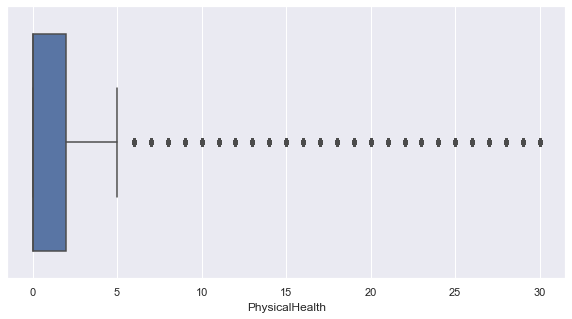

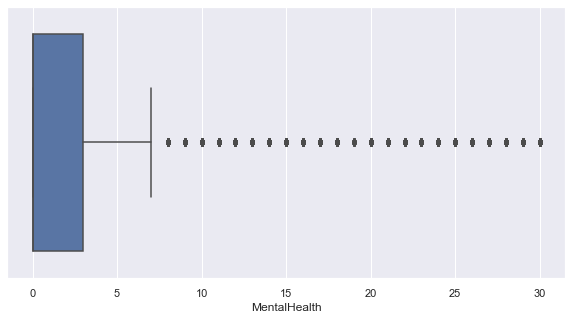

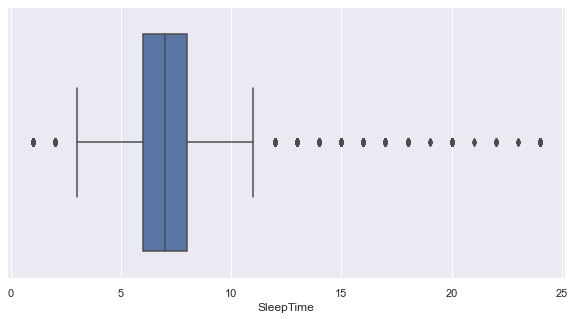

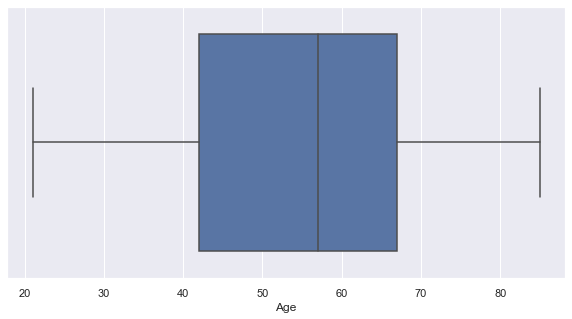

In [29]:
for col in num_var_before_encoding:
    plt.figure(figsize = (10,5))
    sns.boxplot(data[col])
    plt.show()

### Trying log + 1 to reduce the skewness and normalize and outlier removal:

In [30]:
cols_to_log_transform = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for col in cols_to_log_transform:
    data[col]= np.log(data[col] + 1)

In [31]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
for col in cols_to_log_transform:
    data[col] = normalize(data[col])

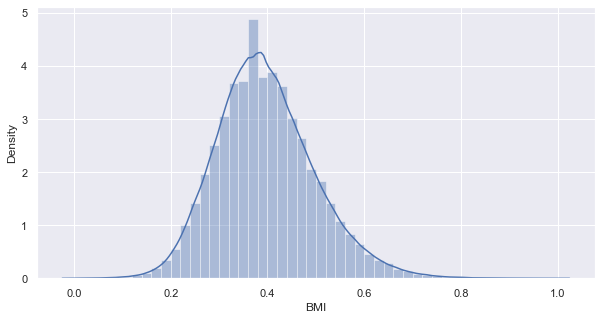

BMI 0.4619382969751422


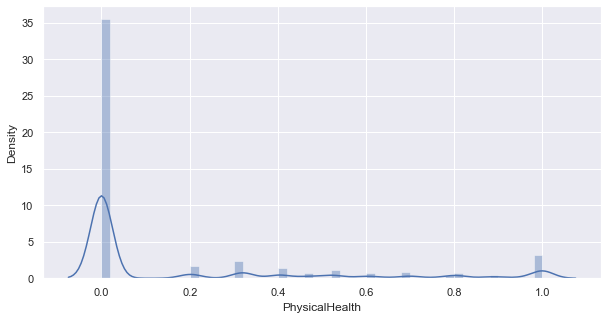

PhysicalHealth 1.594204941934908


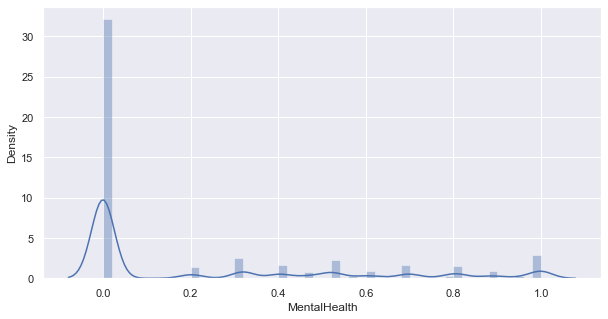

MentalHealth 1.2024540368106154


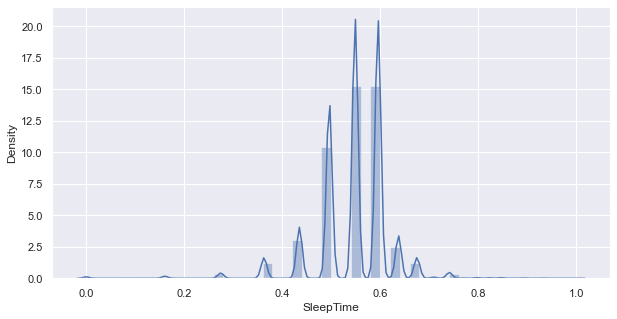

SleepTime -1.3246860399952027


In [32]:
for col in cols_to_log_transform:
    plt.figure(figsize = (10,5))
    sns.distplot(data[col])
    plt.show()
    print(col, data[col].skew())

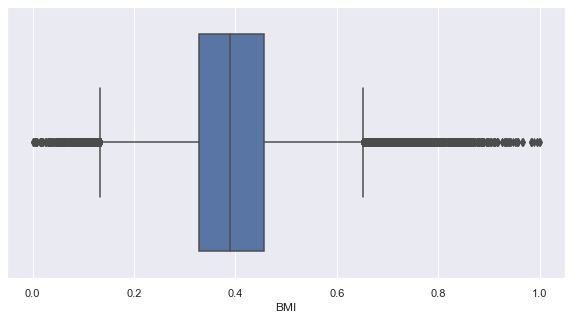

count    319795.000000
mean          0.396041
std           0.101816
min           0.000000
25%           0.327400
50%           0.389615
75%           0.456990
max           1.000000
Name: BMI, dtype: float64


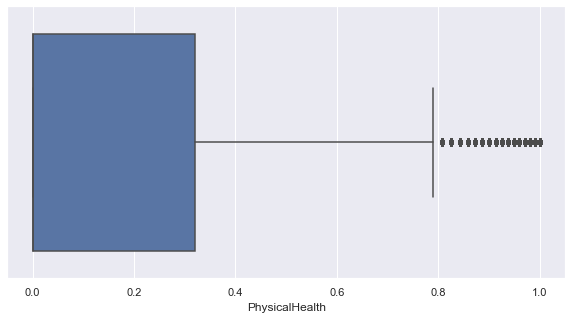

count    319795.000000
mean          0.177577
std           0.316024
min           0.000000
25%           0.000000
50%           0.000000
75%           0.319923
max           1.000000
Name: PhysicalHealth, dtype: float64


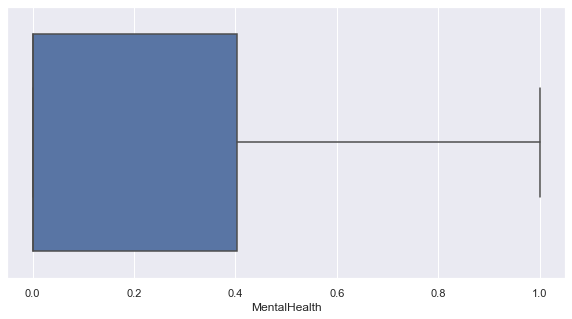

count    319795.000000
mean          0.218830
std           0.331553
min           0.000000
25%           0.000000
50%           0.000000
75%           0.403698
max           1.000000
Name: MentalHealth, dtype: float64


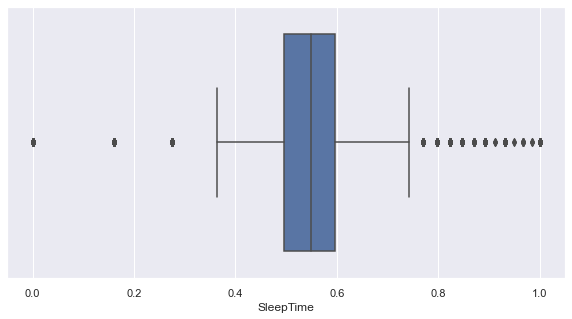

count    319795.000000
mean          0.547066
std           0.074577
min           0.000000
25%           0.496001
50%           0.548869
75%           0.595502
max           1.000000
Name: SleepTime, dtype: float64


In [33]:
for col in cols_to_log_transform:
    plt.figure(figsize = (10,5))
    sns.boxplot(data[col])
    plt.show()
    print(data[col].describe())

In [34]:
data.shape

(319795, 18)

In [35]:
for col in data[cols_to_log_transform]:
    lb = data[col].mean() - 3*data[col].std()
    ub = data[col].mean() + 3*data[col].std()
    data = data[(data[col]>=lb) & (data[col]<=ub)]
data.shape

(313593, 18)

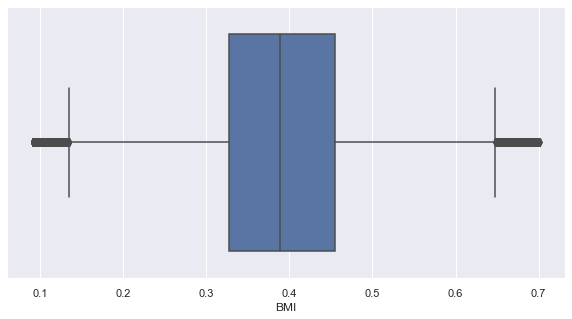

count    313593.000000
mean          0.394089
std           0.097890
min           0.090881
25%           0.327200
50%           0.388730
75%           0.455443
max           0.701405
Name: BMI, dtype: float64


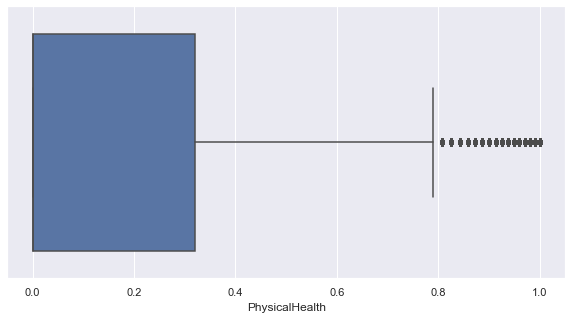

count    313593.000000
mean          0.172954
std           0.311605
min           0.000000
25%           0.000000
50%           0.000000
75%           0.319923
max           1.000000
Name: PhysicalHealth, dtype: float64


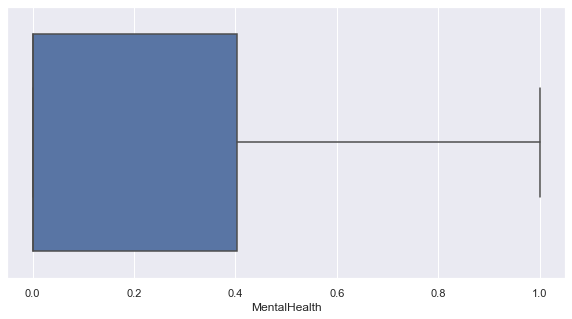

count    313593.000000
mean          0.215199
std           0.328458
min           0.000000
25%           0.000000
50%           0.000000
75%           0.403698
max           1.000000
Name: MentalHealth, dtype: float64


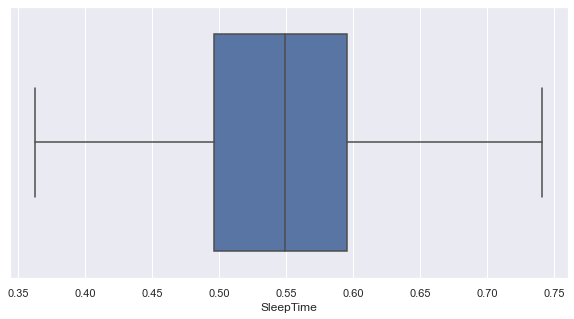

count    313593.000000
mean          0.549871
std           0.063012
min           0.362783
25%           0.496001
50%           0.548869
75%           0.595502
max           0.741094
Name: SleepTime, dtype: float64


In [36]:
for col in cols_to_log_transform:
    plt.figure(figsize = (10,5))
    sns.boxplot(data[col])
    plt.show()
    print(data[col].describe())

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313593 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313593 non-null  object 
 1   BMI               313593 non-null  float64
 2   Smoking           313593 non-null  object 
 3   AlcoholDrinking   313593 non-null  object 
 4   Stroke            313593 non-null  object 
 5   PhysicalHealth    313593 non-null  float64
 6   MentalHealth      313593 non-null  float64
 7   DiffWalking       313593 non-null  object 
 8   Sex               313593 non-null  object 
 9   Race              313593 non-null  object 
 10  Diabetic          313593 non-null  object 
 11  PhysicalActivity  313593 non-null  object 
 12  GenHealth         313593 non-null  object 
 13  SleepTime         313593 non-null  float64
 14  Asthma            313593 non-null  object 
 15  KidneyDisease     313593 non-null  object 
 16  SkinCancer        31

In [38]:
for col in ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'KidneyDisease', 'SkinCancer']:
    print(data[col].value_counts(normalize=True).mul(100).round(1))
    print() 

No     91.6
Yes     8.4
Name: HeartDisease, dtype: float64

No     93.2
Yes     6.8
Name: AlcoholDrinking, dtype: float64

No     96.3
Yes     3.7
Name: Stroke, dtype: float64

No     96.4
Yes     3.6
Name: KidneyDisease, dtype: float64

No     90.6
Yes     9.4
Name: SkinCancer, dtype: float64



### Chances of heart disease increases with age-

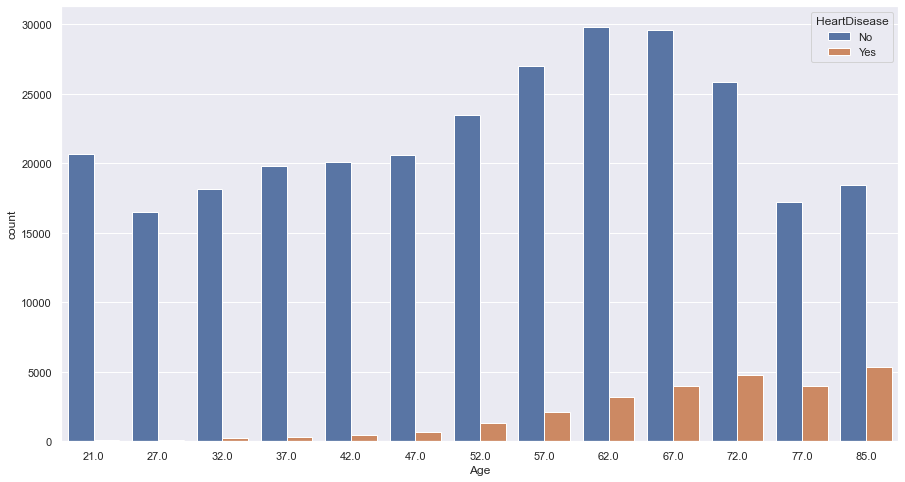

In [39]:
plt.figure(figsize = (15,8))
sns.countplot(data = data, x = 'Age',hue = 'HeartDisease')
plt.show()

In [121]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,No,0.150986,Yes,No,No,0.403698,1.0,No,Female,White,Yes,Yes,Very good,0.434968,Yes,No,Yes,57.0
1,No,0.247506,No,No,Yes,0.000000,0.0,No,Female,White,No,Yes,Very good,0.548869,No,No,No,85.0
2,No,0.375998,Yes,No,No,0.886585,1.0,No,Male,White,Yes,Yes,Fair,0.595502,Yes,No,No,67.0
3,No,0.330990,No,No,No,0.000000,0.0,No,Female,White,No,No,Good,0.496001,No,No,Yes,77.0
4,No,0.320955,No,No,No,0.980579,0.0,Yes,Female,White,No,Yes,Very good,0.595502,No,No,No,42.0


In [40]:
print(len(cat_var))
print(cat_var)

13
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [41]:
print(len(num_var_before_encoding))
print(num_var_before_encoding)

5
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']


### Applying label encoding (did mapping rather than using label encoding) and one hot encoding in the respective columns.

In [42]:
columns_to_label_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
                           'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [43]:
for col in columns_to_label_encode:
    data[col] = data[col].replace({'No': 0, 'Yes': 1, 'No, borderline diabetes':0,'Yes (during pregnancy)':1})

In [44]:
data['GenHealth'] = data['GenHealth'].replace({'Poor': 1, 'Fair': 2, 'Good':3, 'Very good':4, 'Excellent':5})

In [45]:
one_hot_encoded_columns = ['Sex', 'Race']
for col in one_hot_encoded_columns:
    col_new = pd.get_dummies(data[col], prefix=col)
    data = pd.concat((data, col_new), axis=1).drop(col, axis=1)

In [46]:
data.shape

(313593, 24)

In [47]:
data.iloc[:,1:].corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,GenHealth,...,SkinCancer,Age,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
BMI,1.000000,0.026021,-0.038692,0.019887,0.097359,0.035775,0.156071,0.197836,-0.135759,-0.214673,...,-0.027948,0.013315,-0.055424,0.055424,0.025368,-0.084592,0.076671,0.023382,0.008371,-0.041654
Smoking,0.026021,1.000000,0.111544,0.060820,0.107182,0.062957,0.118490,0.055255,-0.096371,-0.174092,...,0.034184,0.129503,-0.085351,0.085351,0.035213,-0.059978,-0.037497,-0.066798,0.015996,0.072069
AlcoholDrinking,-0.038692,0.111544,1.000000,-0.020542,-0.016259,0.057472,-0.035146,-0.057501,0.016846,0.029616,...,-0.005938,-0.059349,-0.002918,0.002918,-0.003986,-0.022570,-0.025622,-0.016419,0.005235,0.033803
Stroke,0.019887,0.060820,-0.020542,1.000000,0.129032,0.030584,0.172215,0.102872,-0.078249,-0.165813,...,0.047753,0.138902,0.002599,-0.002599,0.013794,-0.015950,0.023762,-0.026442,0.004990,0.002805
PhysicalHealth,0.097359,0.107182,-0.016259,0.129032,1.000000,0.281827,0.399010,0.148003,-0.209952,-0.480821,...,0.038984,0.088782,0.056199,-0.056199,0.021959,-0.038803,0.014708,-0.008367,0.015624,-0.002153
MentalHealth,0.035775,0.062957,0.057472,0.030584,0.281827,1.000000,0.117570,0.008677,-0.057437,-0.212826,...,-0.045390,-0.218924,0.130397,-0.130397,0.015652,-0.021708,0.006050,0.003441,0.029140,-0.015015
DiffWalking,0.156071,0.118490,-0.035146,0.172215,0.399010,0.117570,1.000000,0.203930,-0.271878,-0.404180,...,0.066681,0.247779,0.066646,-0.066646,0.024362,-0.037882,0.037371,-0.008446,0.006746,-0.013114
Diabetic,0.197836,0.055255,-0.057501,0.102872,0.148003,0.008677,0.203930,1.000000,-0.132936,-0.266993,...,0.034981,0.195714,0.000790,-0.000790,0.025703,-0.011851,0.052857,0.006646,0.005684,-0.042173
PhysicalActivity,-0.135759,-0.096371,0.016846,-0.078249,-0.209952,-0.057437,-0.271878,-0.132936,1.000000,0.274984,...,-0.001588,-0.124329,-0.046476,0.046476,-0.017318,0.011213,-0.042147,-0.057993,0.002690,0.063868
GenHealth,-0.214673,-0.174092,0.029616,-0.165813,-0.480821,-0.212826,-0.404180,-0.266993,0.274984,1.000000,...,-0.051771,-0.191756,-0.023729,0.023729,-0.036945,0.031985,-0.060560,-0.029072,-0.014221,0.061222


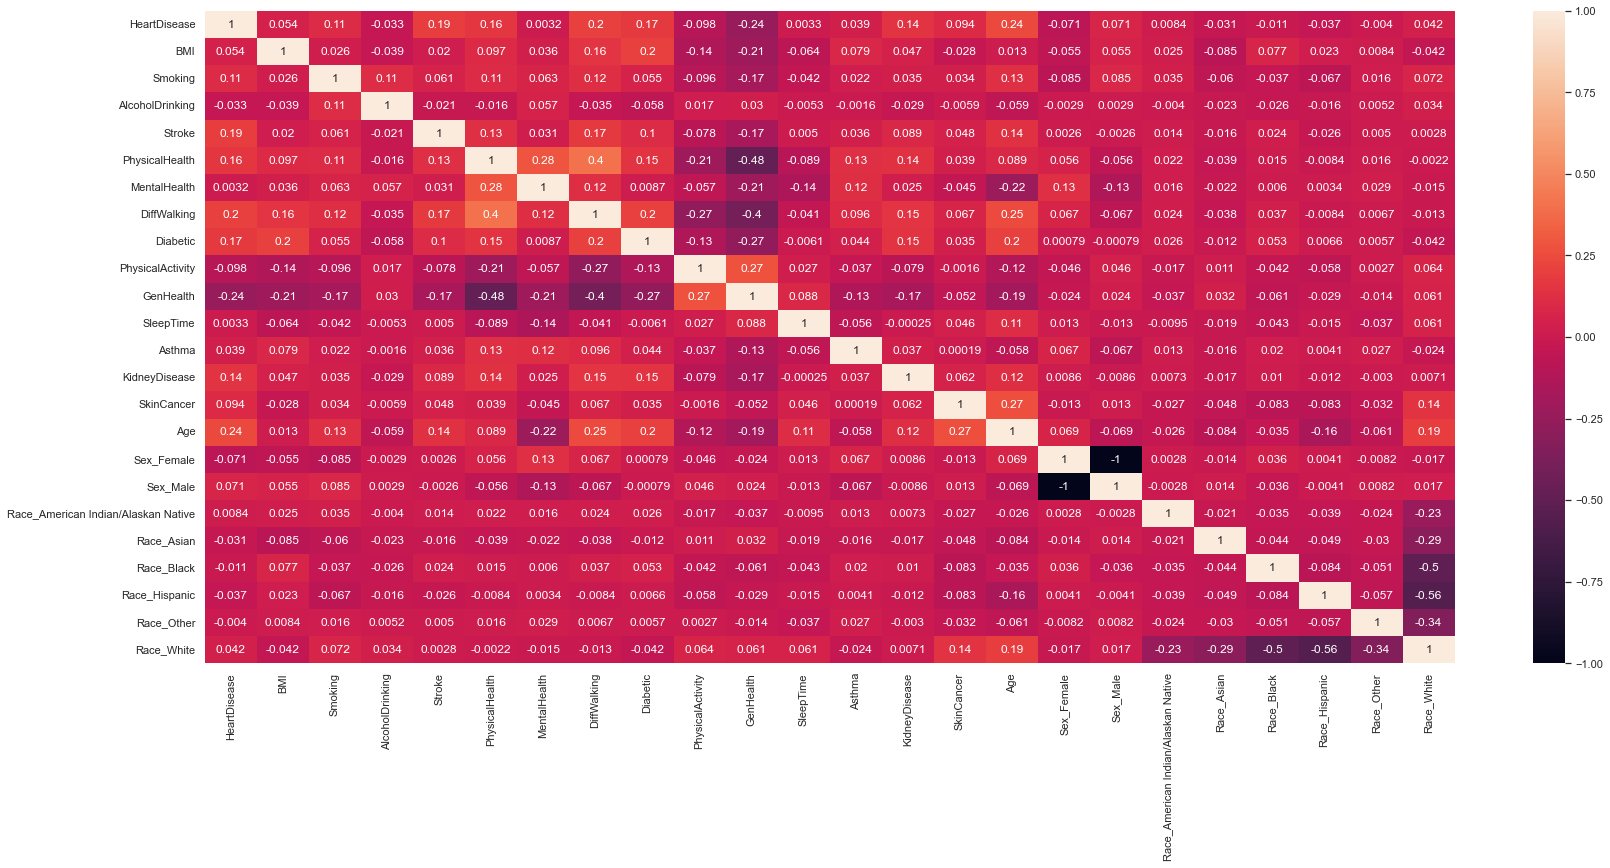

In [48]:
plt.figure(figsize = (28,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

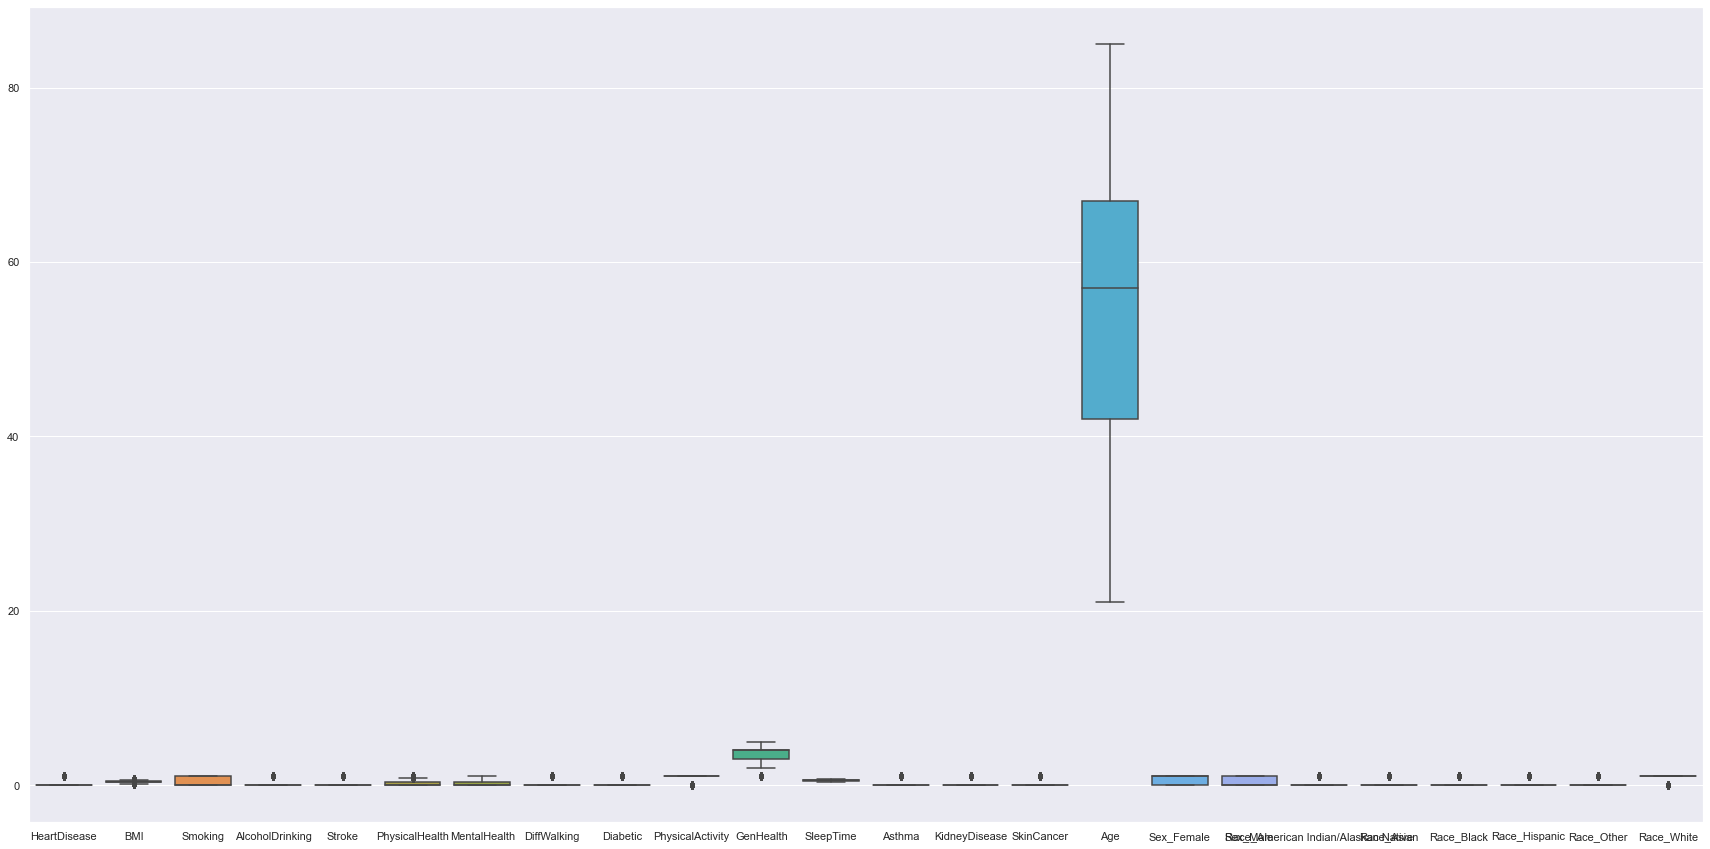

In [49]:
plt.figure(figsize = (30,15))
sns.boxplot(data=data)
plt.show()

In [50]:
data.shape

(313593, 24)

<AxesSubplot:>

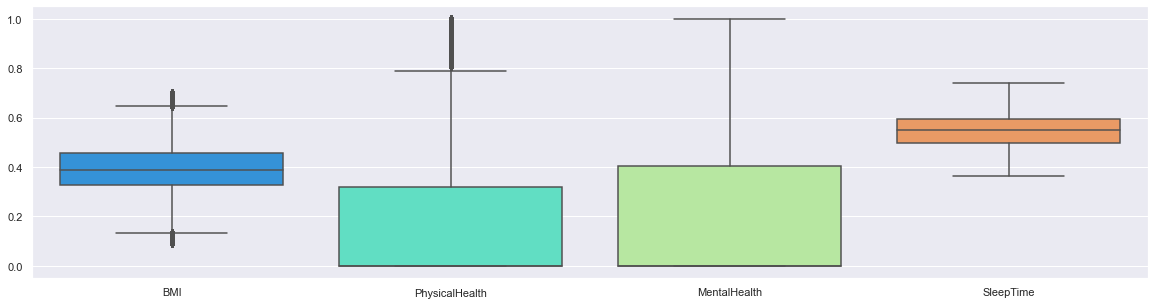

In [51]:
plt.figure(figsize = (20,5))
sns.boxplot(data=data[num_var], palette="rainbow")

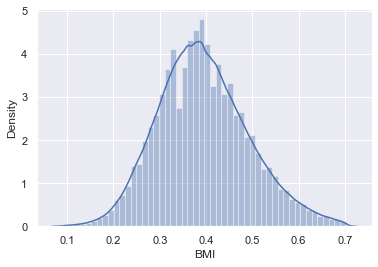

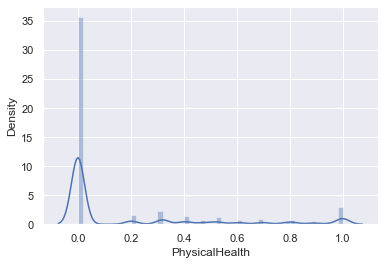

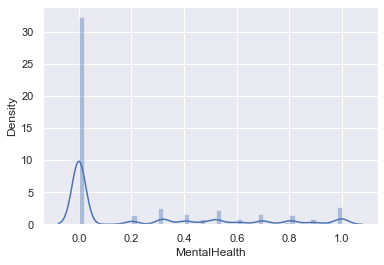

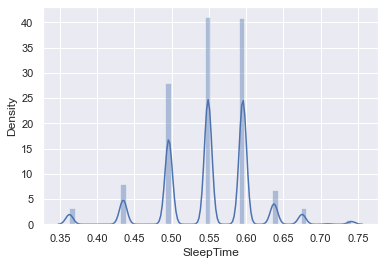

In [52]:
for col in num_var:
    sns.distplot(data[col])
    plt.show()

In [53]:
data.shape

(313593, 24)

In [54]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Age', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

#### While deploying the model might have an issue with the name of this class, hence renaming it.

In [56]:
data.rename(columns = {'Race_American Indian/Alaskan Native':'Race_American_Indian_Alaskan_Native'}, inplace = True)

In [57]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Age', 'Sex_Female', 'Sex_Male',
       'Race_American_Indian_Alaskan_Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313593 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         313593 non-null  int64  
 1   BMI                                  313593 non-null  float64
 2   Smoking                              313593 non-null  int64  
 3   AlcoholDrinking                      313593 non-null  int64  
 4   Stroke                               313593 non-null  int64  
 5   PhysicalHealth                       313593 non-null  float64
 6   MentalHealth                         313593 non-null  float64
 7   DiffWalking                          313593 non-null  int64  
 8   Diabetic                             313593 non-null  int64  
 9   PhysicalActivity                     313593 non-null  int64  
 10  GenHealth                            313593 non-null  int64  
 11  SleepTime    

### Applying sampling technique and modelling.

In [99]:
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_curve, roc_curve, log_loss, precision_score, recall_score, f1_score

In [80]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter 
from catboost import CatBoostClassifier

In [61]:
!pip install catboost

In [63]:
X = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [144]:
os = SMOTETomek(0.75, n_jobs = -1)
X_ns, y_ns = os.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_ns)))
print('Resampled dataset shape {}'.format(Counter(y)))

Resampled dataset shape Counter({0: 278242, 1: 206459})
Resampled dataset shape Counter({0: 287131, 1: 26462})


In [ ]:
X_ns.shape, y_ns.shape

In [ ]:
X_ns

In [147]:
new_data_df = pd.DataFrame(X_ns, columns=X_ns.columns)
new_data_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,GenHealth,...,SkinCancer,Age,Sex_Female,Sex_Male,Race_American_Indian_Alaskan_Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.150986,1,0,0,0.403698,1.000000,0,1,1,4,...,1,57.0,1,0,0,0,0,0,0,1
1,0.247506,0,0,1,0.000000,0.000000,0,0,1,4,...,0,85.0,1,0,0,0,0,0,0,1
2,0.375998,1,0,0,0.886585,1.000000,0,1,1,2,...,0,67.0,0,1,0,0,0,0,0,1
3,0.320955,0,0,0,0.980579,0.000000,1,0,1,4,...,0,42.0,1,0,0,0,0,0,0,1
4,0.415954,1,0,0,0.566662,0.000000,1,0,0,2,...,0,77.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484696,0.418454,1,0,0,0.000000,0.000000,0,0,0,3,...,1,67.0,0,1,0,0,0,0,0,1
484697,0.462336,1,0,0,0.979641,1.000000,1,1,0,1,...,0,62.0,1,0,0,0,0,0,0,1
484698,0.452801,0,0,0,0.000000,0.000000,0,0,1,2,...,0,77.0,1,0,0,0,0,1,0,0
484699,0.526535,1,0,0,0.832244,0.772206,1,0,0,1,...,0,52.0,1,0,0,0,0,0,1,0


In [148]:
y_ns

0         0
1         0
2         0
3         0
4         1
         ..
484696    1
484697    1
484698    1
484699    1
484700    1
Name: HeartDisease, Length: 484701, dtype: int64

In [149]:
new_data_y_df = pd.DataFrame(y_ns, columns=['HeartDisease'])
new_data_y_df

,HeartDisease
0,0
1,0
2,0
3,0
4,1
...,...
484696,1
484697,1
484698,1
484699,1


In [150]:
new_data_fresh_after_outlier_removal = new_data_df.join(new_data_y_df)
new_data_fresh_after_outlier_removal

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,GenHealth,...,Age,Sex_Female,Sex_Male,Race_American_Indian_Alaskan_Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,0.150986,1,0,0,0.403698,1.000000,0,1,1,4,...,57.0,1,0,0,0,0,0,0,1,0
1,0.247506,0,0,1,0.000000,0.000000,0,0,1,4,...,85.0,1,0,0,0,0,0,0,1,0
2,0.375998,1,0,0,0.886585,1.000000,0,1,1,2,...,67.0,0,1,0,0,0,0,0,1,0
3,0.320955,0,0,0,0.980579,0.000000,1,0,1,4,...,42.0,1,0,0,0,0,0,0,1,0
4,0.415954,1,0,0,0.566662,0.000000,1,0,0,2,...,77.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484696,0.418454,1,0,0,0.000000,0.000000,0,0,0,3,...,67.0,0,1,0,0,0,0,0,1,1
484697,0.462336,1,0,0,0.979641,1.000000,1,1,0,1,...,62.0,1,0,0,0,0,0,0,1,1
484698,0.452801,0,0,0,0.000000,0.000000,0,0,1,2,...,77.0,1,0,0,0,0,1,0,0,1
484699,0.526535,1,0,0,0.832244,0.772206,1,0,0,1,...,52.0,1,0,0,0,0,0,1,0,1


In [151]:
new_data_fresh_after_outlier_removal.to_csv('new_data_fresh_after_outlier_removal.csv')

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_ns, y_ns, test_size=0.30, random_state=42)

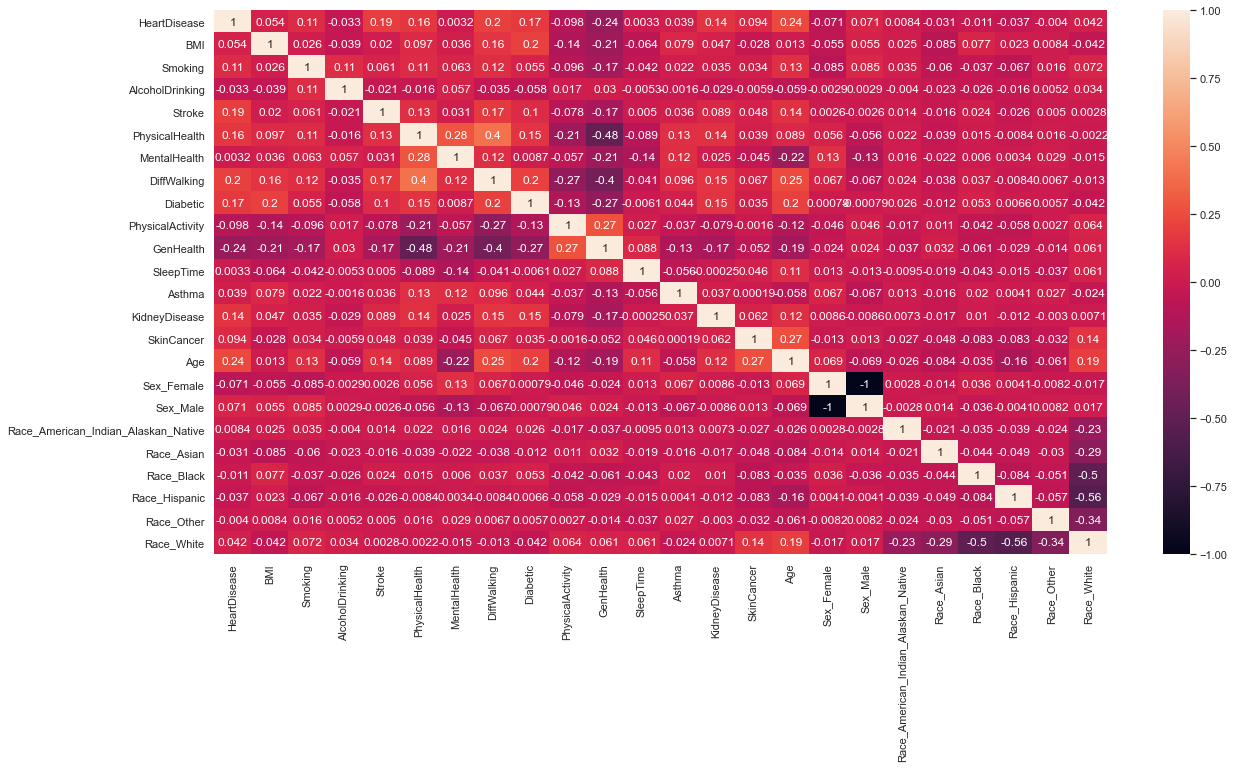

In [153]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [154]:
forest = RandomForestClassifier(criterion='gini', n_estimators=1000, random_state=42, n_jobs=-1)
model = forest.fit(X_train, y_train)

In [ ]:
light_gbm = LGBMClassifier(n_estimators=1000, min_child_samples=100)
model_light = light_gbm.fit(X_train, y_train)

### Cross validating

In [157]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10)

In [158]:
print(all_accuracies.mean())
print(all_accuracies.std())

0.921925196734357
0.0015051025126159641


In [75]:
print(all_accuracies.mean())
print(all_accuracies.std())

0.9205454013951406
0.0017838292627103745


### Applying Grid Search

In [86]:
grid_param = {'n_estimators': [100, 300, 500, 800, 1000],
              'criterion': ['gini', 'entropy'],
             'bootstrap': [True, False]
             }

In [87]:
gd_sr = GridSearchCV(estimator=forest, param_grid=grid_param,
                     scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

In [ ]:
roc_auc_score(y, y_pred, average=None)

### Prediction

In [155]:
# model after removing outliers
y_pred = model.predict(X_test)

print('\n')
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



Confusion matrix: 
 [[77922  5712]
 [ 5252 56525]]
Accuracy: 0.9245999271031765
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     83634
           1       0.91      0.91      0.91     61777

    accuracy                           0.92    145411
   macro avg       0.92      0.92      0.92    145411
weighted avg       0.92      0.92      0.92    145411



In [73]:
## model without removing outliers
y_pred = model.predict(X_test)

print('\n')
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



Confusion matrix: 
 [[79010  6093]
 [ 5270 57799]]
Accuracy: 0.9233120967524229
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     85103
           1       0.90      0.92      0.91     63069

    accuracy                           0.92    148172
   macro avg       0.92      0.92      0.92    148172
weighted avg       0.92      0.92      0.92    148172



In [159]:
import pickle
pickle.dump(model, open('model_new_outlier.pkl','wb'))

In [10]:
!pip install joblib

In [68]:
result = model.predict([[24, 1, 1, 1,
       10, 5, 3, 0,
       1, 1, 10, 0, 0,
       1, 42, 0, 1,
       0, 1, 0,
       0, 0, 0]])
print(result)
if result == 1:
    print("Has heart disease")
else:
    print("does not have heart disease")

[1]
Has heart disease


In [69]:
result = model.predict([[24, 0, 0, 0,
       3, 5, 3, 0,
       0, 0, 6, 0, 0,
       1, 25, 0, 1,
       0, 1, 0,
       0, 0, 0]])
print(result)
if result == 1:
    print("Has heart disease")
else:
    print("does not have heart disease")

[0]
does not have heart disease


### Trying catboost classifier on my data which i saved as a csv after smote-

In [65]:
import pickle
with open('C:/Users/vaisa/case_study_hearty/models/model_new.pkl', 'rb') as f:
    model = pickle.load(f)

In [70]:
new_data = pd.read_csv('data/new_case_study_data_smote.csv')
new_data.head()

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Age,Sex_Female,Sex_Male,Race_American_Indian_Alaskan_Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,0,0.150986,1,0,0,0.403698,1.0,0,1,1,...,57.0,1,0,0,0,0,0,0,1,0
1,1,0.247506,0,0,1,0.000000,0.0,0,0,1,...,85.0,1,0,0,0,0,0,0,1,0
2,2,0.375998,1,0,0,0.886585,1.0,0,1,1,...,67.0,0,1,0,0,0,0,0,1,0
3,3,0.330990,0,0,0,0.000000,0.0,0,0,0,...,77.0,1,0,0,0,0,0,0,1,0
4,4,0.320955,0,0,0,0.980579,0.0,1,0,1,...,42.0,1,0,0,0,0,0,0,1,0


In [73]:
new_data.columns

Index(['Unnamed: 0', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Age', 'Sex_Female', 'Sex_Male',
       'Race_American_Indian_Alaskan_Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'HeartDisease'],
      dtype='object')

In [75]:
new_data = new_data.drop(['Unnamed: 0'], axis = 1)
new_data.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'Age', 'Sex_Female', 'Sex_Male', 'Race_American_Indian_Alaskan_Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'HeartDisease'],
      dtype='object')

In [77]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493904 entries, 0 to 493903
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  493904 non-null  float64
 1   Smoking                              493904 non-null  int64  
 2   AlcoholDrinking                      493904 non-null  int64  
 3   Stroke                               493904 non-null  int64  
 4   PhysicalHealth                       493904 non-null  float64
 5   MentalHealth                         493904 non-null  float64
 6   DiffWalking                          493904 non-null  int64  
 7   Diabetic                             493904 non-null  int64  
 8   PhysicalActivity                     493904 non-null  int64  
 9   GenHealth                            493904 non-null  int64  
 10  SleepTime                            493904 non-null  float64
 11  Asthma       

In [78]:
X = new_data.drop(['HeartDisease'], axis = 1)
y = new_data['HeartDisease']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
cat_boost = CatBoostClassifiersifier(n_estimators=1000, random_state=42, eval_metric='AUC')
new_model = cat_boost.fit(X_train, y_train)

Learning rate set to 0.125019
0:	learn: 0.6395929	total: 203ms	remaining: 3m 23s
1:	learn: 0.6009943	total: 236ms	remaining: 1m 58s
2:	learn: 0.5459664	total: 275ms	remaining: 1m 31s
3:	learn: 0.5013364	total: 309ms	remaining: 1m 16s
4:	learn: 0.4783542	total: 346ms	remaining: 1m 8s
5:	learn: 0.4571174	total: 379ms	remaining: 1m 2s
6:	learn: 0.4380968	total: 410ms	remaining: 58.2s
7:	learn: 0.4304671	total: 442ms	remaining: 54.8s
8:	learn: 0.4250931	total: 474ms	remaining: 52.2s
9:	learn: 0.4202162	total: 507ms	remaining: 50.1s
10:	learn: 0.4158870	total: 540ms	remaining: 48.5s
11:	learn: 0.3854237	total: 576ms	remaining: 47.4s
12:	learn: 0.3731150	total: 611ms	remaining: 46.4s
13:	learn: 0.3597663	total: 648ms	remaining: 45.7s
14:	learn: 0.3567005	total: 680ms	remaining: 44.7s
15:	learn: 0.3493713	total: 714ms	remaining: 43.9s
16:	learn: 0.3469892	total: 747ms	remaining: 43.2s
17:	learn: 0.3316953	total: 785ms	remaining: 42.8s
18:	learn: 0.3266059	total: 815ms	remaining: 42.1s
19:	lea

161:	learn: 0.2288469	total: 6.43s	remaining: 33.2s
162:	learn: 0.2287285	total: 6.46s	remaining: 33.2s
163:	learn: 0.2285296	total: 6.49s	remaining: 33.1s
164:	learn: 0.2280670	total: 6.53s	remaining: 33.1s
165:	learn: 0.2279631	total: 6.57s	remaining: 33s
166:	learn: 0.2278741	total: 6.61s	remaining: 33s
167:	learn: 0.2277930	total: 6.65s	remaining: 32.9s
168:	learn: 0.2276222	total: 6.68s	remaining: 32.9s
169:	learn: 0.2275651	total: 6.72s	remaining: 32.8s
170:	learn: 0.2271510	total: 6.76s	remaining: 32.8s
171:	learn: 0.2270718	total: 6.79s	remaining: 32.7s
172:	learn: 0.2270013	total: 6.83s	remaining: 32.7s
173:	learn: 0.2269053	total: 6.87s	remaining: 32.6s
174:	learn: 0.2266736	total: 6.9s	remaining: 32.5s
175:	learn: 0.2265934	total: 6.94s	remaining: 32.5s
176:	learn: 0.2265336	total: 6.98s	remaining: 32.5s
177:	learn: 0.2264709	total: 7.02s	remaining: 32.4s
178:	learn: 0.2264013	total: 7.05s	remaining: 32.3s
179:	learn: 0.2263500	total: 7.08s	remaining: 32.3s
180:	learn: 0.226

323:	learn: 0.2135119	total: 12.6s	remaining: 26.4s
324:	learn: 0.2130971	total: 12.7s	remaining: 26.4s
325:	learn: 0.2130416	total: 12.7s	remaining: 26.3s
326:	learn: 0.2129912	total: 12.8s	remaining: 26.3s
327:	learn: 0.2129468	total: 12.8s	remaining: 26.3s
328:	learn: 0.2128974	total: 12.9s	remaining: 26.3s
329:	learn: 0.2128402	total: 12.9s	remaining: 26.2s
330:	learn: 0.2128076	total: 13s	remaining: 26.2s
331:	learn: 0.2127736	total: 13s	remaining: 26.1s
332:	learn: 0.2127244	total: 13s	remaining: 26.1s
333:	learn: 0.2126808	total: 13.1s	remaining: 26.1s
334:	learn: 0.2126354	total: 13.1s	remaining: 26s
335:	learn: 0.2126054	total: 13.1s	remaining: 26s
336:	learn: 0.2125780	total: 13.2s	remaining: 25.9s
337:	learn: 0.2125204	total: 13.2s	remaining: 25.9s
338:	learn: 0.2124822	total: 13.3s	remaining: 25.8s
339:	learn: 0.2124458	total: 13.3s	remaining: 25.8s
340:	learn: 0.2123973	total: 13.3s	remaining: 25.8s
341:	learn: 0.2123627	total: 13.4s	remaining: 25.7s
342:	learn: 0.2123394	

487:	learn: 0.2065236	total: 19.5s	remaining: 20.4s
488:	learn: 0.2065008	total: 19.5s	remaining: 20.4s
489:	learn: 0.2064688	total: 19.6s	remaining: 20.4s
490:	learn: 0.2064437	total: 19.6s	remaining: 20.3s
491:	learn: 0.2064149	total: 19.6s	remaining: 20.3s
492:	learn: 0.2063883	total: 19.7s	remaining: 20.2s
493:	learn: 0.2063624	total: 19.7s	remaining: 20.2s
494:	learn: 0.2063378	total: 19.8s	remaining: 20.2s
495:	learn: 0.2063098	total: 19.8s	remaining: 20.1s
496:	learn: 0.2062757	total: 19.9s	remaining: 20.1s
497:	learn: 0.2062397	total: 19.9s	remaining: 20.1s
498:	learn: 0.2062201	total: 19.9s	remaining: 20s
499:	learn: 0.2061909	total: 20s	remaining: 20s
500:	learn: 0.2061625	total: 20s	remaining: 19.9s
501:	learn: 0.2061376	total: 20s	remaining: 19.9s
502:	learn: 0.2061097	total: 20.1s	remaining: 19.8s
503:	learn: 0.2060895	total: 20.1s	remaining: 19.8s
504:	learn: 0.2060661	total: 20.2s	remaining: 19.8s
505:	learn: 0.2060376	total: 20.2s	remaining: 19.7s
506:	learn: 0.2060114	

651:	learn: 0.2015186	total: 26.1s	remaining: 13.9s
652:	learn: 0.2014989	total: 26.2s	remaining: 13.9s
653:	learn: 0.2014822	total: 26.2s	remaining: 13.9s
654:	learn: 0.2014646	total: 26.2s	remaining: 13.8s
655:	learn: 0.2014468	total: 26.3s	remaining: 13.8s
656:	learn: 0.2014207	total: 26.3s	remaining: 13.7s
657:	learn: 0.2013718	total: 26.3s	remaining: 13.7s
658:	learn: 0.2013529	total: 26.4s	remaining: 13.7s
659:	learn: 0.2013111	total: 26.4s	remaining: 13.6s
660:	learn: 0.2012815	total: 26.5s	remaining: 13.6s
661:	learn: 0.2012597	total: 26.5s	remaining: 13.5s
662:	learn: 0.2012496	total: 26.5s	remaining: 13.5s
663:	learn: 0.2012252	total: 26.6s	remaining: 13.4s
664:	learn: 0.2012071	total: 26.6s	remaining: 13.4s
665:	learn: 0.2011894	total: 26.7s	remaining: 13.4s
666:	learn: 0.2011570	total: 26.7s	remaining: 13.3s
667:	learn: 0.2011434	total: 26.7s	remaining: 13.3s
668:	learn: 0.2011135	total: 26.8s	remaining: 13.2s
669:	learn: 0.2011032	total: 26.8s	remaining: 13.2s
670:	learn: 

814:	learn: 0.1979086	total: 32.4s	remaining: 7.34s
815:	learn: 0.1978901	total: 32.4s	remaining: 7.3s
816:	learn: 0.1978720	total: 32.4s	remaining: 7.26s
817:	learn: 0.1978596	total: 32.5s	remaining: 7.22s
818:	learn: 0.1978412	total: 32.5s	remaining: 7.18s
819:	learn: 0.1978246	total: 32.6s	remaining: 7.15s
820:	learn: 0.1978121	total: 32.6s	remaining: 7.11s
821:	learn: 0.1977930	total: 32.7s	remaining: 7.07s
822:	learn: 0.1977753	total: 32.7s	remaining: 7.03s
823:	learn: 0.1977553	total: 32.7s	remaining: 6.99s
824:	learn: 0.1977201	total: 32.8s	remaining: 6.95s
825:	learn: 0.1976935	total: 32.8s	remaining: 6.91s
826:	learn: 0.1976479	total: 32.8s	remaining: 6.87s
827:	learn: 0.1976237	total: 32.9s	remaining: 6.83s
828:	learn: 0.1975865	total: 32.9s	remaining: 6.79s
829:	learn: 0.1975673	total: 33s	remaining: 6.75s
830:	learn: 0.1975500	total: 33s	remaining: 6.71s
831:	learn: 0.1975320	total: 33.1s	remaining: 6.67s
832:	learn: 0.1975167	total: 33.1s	remaining: 6.63s
833:	learn: 0.197

974:	learn: 0.1950192	total: 38.7s	remaining: 992ms
975:	learn: 0.1949898	total: 38.7s	remaining: 953ms
976:	learn: 0.1949710	total: 38.8s	remaining: 913ms
977:	learn: 0.1949607	total: 38.8s	remaining: 873ms
978:	learn: 0.1949523	total: 38.9s	remaining: 834ms
979:	learn: 0.1949306	total: 38.9s	remaining: 794ms
980:	learn: 0.1949104	total: 38.9s	remaining: 754ms
981:	learn: 0.1948870	total: 39s	remaining: 715ms
982:	learn: 0.1948723	total: 39s	remaining: 675ms
983:	learn: 0.1948588	total: 39.1s	remaining: 635ms
984:	learn: 0.1948476	total: 39.1s	remaining: 596ms
985:	learn: 0.1948356	total: 39.1s	remaining: 556ms
986:	learn: 0.1948210	total: 39.2s	remaining: 516ms
987:	learn: 0.1948068	total: 39.2s	remaining: 476ms
988:	learn: 0.1947917	total: 39.2s	remaining: 437ms
989:	learn: 0.1947738	total: 39.3s	remaining: 397ms
990:	learn: 0.1947540	total: 39.3s	remaining: 357ms
991:	learn: 0.1947330	total: 39.4s	remaining: 318ms
992:	learn: 0.1946983	total: 39.4s	remaining: 278ms
993:	learn: 0.19

In [85]:
y_pred = new_model.predict(X_test)

print('\n')
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



Confusion matrix: 
 [[81272  3831]
 [ 9277 53792]]
Accuracy: 0.911535242825905
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     85103
           1       0.93      0.85      0.89     63069

    accuracy                           0.91    148172
   macro avg       0.92      0.90      0.91    148172
weighted avg       0.91      0.91      0.91    148172



In [86]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=cat_boost, X=X_train, y=y_train, cv=10)

Learning rate set to 0.119519
0:	learn: 0.6417722	total: 32.5ms	remaining: 32.4s
1:	learn: 0.6039208	total: 63ms	remaining: 31.4s
2:	learn: 0.5763878	total: 99.8ms	remaining: 33.2s
3:	learn: 0.5279467	total: 139ms	remaining: 34.6s
4:	learn: 0.4882102	total: 178ms	remaining: 35.4s
5:	learn: 0.4676362	total: 215ms	remaining: 35.7s
6:	learn: 0.4474815	total: 245ms	remaining: 34.8s
7:	learn: 0.4401927	total: 278ms	remaining: 34.4s
8:	learn: 0.4079185	total: 317ms	remaining: 34.9s
9:	learn: 0.3932262	total: 348ms	remaining: 34.5s
10:	learn: 0.3884354	total: 383ms	remaining: 34.4s
11:	learn: 0.3775753	total: 424ms	remaining: 34.9s
12:	learn: 0.3645207	total: 455ms	remaining: 34.6s
13:	learn: 0.3616899	total: 486ms	remaining: 34.2s
14:	learn: 0.3491435	total: 519ms	remaining: 34.1s
15:	learn: 0.3445109	total: 559ms	remaining: 34.4s
16:	learn: 0.3357156	total: 595ms	remaining: 34.4s
17:	learn: 0.3323557	total: 630ms	remaining: 34.4s
18:	learn: 0.3221334	total: 669ms	remaining: 34.6s
19:	learn:

164:	learn: 0.2289072	total: 5.92s	remaining: 29.9s
165:	learn: 0.2287501	total: 5.95s	remaining: 29.9s
166:	learn: 0.2285777	total: 5.98s	remaining: 29.8s
167:	learn: 0.2281789	total: 6.01s	remaining: 29.8s
168:	learn: 0.2281295	total: 6.05s	remaining: 29.7s
169:	learn: 0.2280599	total: 6.08s	remaining: 29.7s
170:	learn: 0.2278677	total: 6.1s	remaining: 29.6s
171:	learn: 0.2277233	total: 6.13s	remaining: 29.5s
172:	learn: 0.2276613	total: 6.17s	remaining: 29.5s
173:	learn: 0.2273479	total: 6.2s	remaining: 29.4s
174:	learn: 0.2272523	total: 6.24s	remaining: 29.4s
175:	learn: 0.2271686	total: 6.27s	remaining: 29.4s
176:	learn: 0.2271040	total: 6.3s	remaining: 29.3s
177:	learn: 0.2269660	total: 6.33s	remaining: 29.2s
178:	learn: 0.2268789	total: 6.36s	remaining: 29.2s
179:	learn: 0.2267668	total: 6.39s	remaining: 29.1s
180:	learn: 0.2266745	total: 6.42s	remaining: 29.1s
181:	learn: 0.2265123	total: 6.46s	remaining: 29s
182:	learn: 0.2264433	total: 6.49s	remaining: 29s
183:	learn: 0.22637

326:	learn: 0.2134588	total: 11.3s	remaining: 23.2s
327:	learn: 0.2134176	total: 11.3s	remaining: 23.2s
328:	learn: 0.2133235	total: 11.3s	remaining: 23.1s
329:	learn: 0.2132819	total: 11.4s	remaining: 23.1s
330:	learn: 0.2132296	total: 11.4s	remaining: 23.1s
331:	learn: 0.2132035	total: 11.4s	remaining: 23s
332:	learn: 0.2130997	total: 11.5s	remaining: 23s
333:	learn: 0.2130632	total: 11.5s	remaining: 23s
334:	learn: 0.2130091	total: 11.6s	remaining: 23s
335:	learn: 0.2129320	total: 11.6s	remaining: 23s
336:	learn: 0.2129016	total: 11.7s	remaining: 23s
337:	learn: 0.2128706	total: 11.7s	remaining: 23s
338:	learn: 0.2128323	total: 11.8s	remaining: 23s
339:	learn: 0.2127895	total: 11.8s	remaining: 23s
340:	learn: 0.2127603	total: 11.9s	remaining: 22.9s
341:	learn: 0.2125447	total: 11.9s	remaining: 22.9s
342:	learn: 0.2124348	total: 12s	remaining: 22.9s
343:	learn: 0.2123154	total: 12s	remaining: 22.9s
344:	learn: 0.2122361	total: 12.1s	remaining: 22.9s
345:	learn: 0.2121954	total: 12.1s

488:	learn: 0.2065642	total: 17.2s	remaining: 18s
489:	learn: 0.2065411	total: 17.3s	remaining: 18s
490:	learn: 0.2065172	total: 17.3s	remaining: 17.9s
491:	learn: 0.2064997	total: 17.3s	remaining: 17.9s
492:	learn: 0.2064734	total: 17.4s	remaining: 17.9s
493:	learn: 0.2064082	total: 17.4s	remaining: 17.8s
494:	learn: 0.2063680	total: 17.4s	remaining: 17.8s
495:	learn: 0.2063434	total: 17.5s	remaining: 17.8s
496:	learn: 0.2062961	total: 17.5s	remaining: 17.7s
497:	learn: 0.2062744	total: 17.5s	remaining: 17.7s
498:	learn: 0.2062144	total: 17.6s	remaining: 17.6s
499:	learn: 0.2061866	total: 17.6s	remaining: 17.6s
500:	learn: 0.2060697	total: 17.6s	remaining: 17.6s
501:	learn: 0.2060028	total: 17.7s	remaining: 17.5s
502:	learn: 0.2059795	total: 17.7s	remaining: 17.5s
503:	learn: 0.2059548	total: 17.8s	remaining: 17.5s
504:	learn: 0.2059293	total: 17.8s	remaining: 17.4s
505:	learn: 0.2058903	total: 17.8s	remaining: 17.4s
506:	learn: 0.2058428	total: 17.9s	remaining: 17.4s
507:	learn: 0.20

649:	learn: 0.2016513	total: 22.8s	remaining: 12.3s
650:	learn: 0.2016290	total: 22.8s	remaining: 12.2s
651:	learn: 0.2016113	total: 22.8s	remaining: 12.2s
652:	learn: 0.2015918	total: 22.9s	remaining: 12.2s
653:	learn: 0.2015700	total: 22.9s	remaining: 12.1s
654:	learn: 0.2015471	total: 22.9s	remaining: 12.1s
655:	learn: 0.2015125	total: 23s	remaining: 12s
656:	learn: 0.2014880	total: 23s	remaining: 12s
657:	learn: 0.2014651	total: 23.1s	remaining: 12s
658:	learn: 0.2014458	total: 23.1s	remaining: 12s
659:	learn: 0.2014207	total: 23.1s	remaining: 11.9s
660:	learn: 0.2013997	total: 23.2s	remaining: 11.9s
661:	learn: 0.2013795	total: 23.2s	remaining: 11.8s
662:	learn: 0.2013624	total: 23.2s	remaining: 11.8s
663:	learn: 0.2013289	total: 23.3s	remaining: 11.8s
664:	learn: 0.2013110	total: 23.3s	remaining: 11.7s
665:	learn: 0.2012968	total: 23.3s	remaining: 11.7s
666:	learn: 0.2012620	total: 23.4s	remaining: 11.7s
667:	learn: 0.2012397	total: 23.4s	remaining: 11.6s
668:	learn: 0.2011376	to

808:	learn: 0.1977917	total: 28.2s	remaining: 6.66s
809:	learn: 0.1977801	total: 28.2s	remaining: 6.62s
810:	learn: 0.1977599	total: 28.3s	remaining: 6.59s
811:	learn: 0.1977400	total: 28.3s	remaining: 6.55s
812:	learn: 0.1977184	total: 28.3s	remaining: 6.52s
813:	learn: 0.1977049	total: 28.4s	remaining: 6.48s
814:	learn: 0.1976898	total: 28.4s	remaining: 6.45s
815:	learn: 0.1976543	total: 28.4s	remaining: 6.41s
816:	learn: 0.1976392	total: 28.5s	remaining: 6.38s
817:	learn: 0.1976220	total: 28.5s	remaining: 6.34s
818:	learn: 0.1976055	total: 28.6s	remaining: 6.31s
819:	learn: 0.1975775	total: 28.6s	remaining: 6.27s
820:	learn: 0.1975561	total: 28.6s	remaining: 6.24s
821:	learn: 0.1975376	total: 28.7s	remaining: 6.2s
822:	learn: 0.1975156	total: 28.7s	remaining: 6.17s
823:	learn: 0.1974938	total: 28.7s	remaining: 6.13s
824:	learn: 0.1974751	total: 28.8s	remaining: 6.1s
825:	learn: 0.1974639	total: 28.8s	remaining: 6.07s
826:	learn: 0.1974447	total: 28.8s	remaining: 6.03s
827:	learn: 0.

972:	learn: 0.1945715	total: 34s	remaining: 942ms
973:	learn: 0.1945199	total: 34s	remaining: 907ms
974:	learn: 0.1945075	total: 34s	remaining: 872ms
975:	learn: 0.1944953	total: 34.1s	remaining: 838ms
976:	learn: 0.1944878	total: 34.1s	remaining: 803ms
977:	learn: 0.1944501	total: 34.1s	remaining: 768ms
978:	learn: 0.1944288	total: 34.2s	remaining: 733ms
979:	learn: 0.1944136	total: 34.2s	remaining: 698ms
980:	learn: 0.1943897	total: 34.2s	remaining: 663ms
981:	learn: 0.1943692	total: 34.3s	remaining: 628ms
982:	learn: 0.1943515	total: 34.3s	remaining: 593ms
983:	learn: 0.1943297	total: 34.3s	remaining: 558ms
984:	learn: 0.1943134	total: 34.4s	remaining: 523ms
985:	learn: 0.1942961	total: 34.4s	remaining: 488ms
986:	learn: 0.1942836	total: 34.4s	remaining: 453ms
987:	learn: 0.1942710	total: 34.5s	remaining: 418ms
988:	learn: 0.1942580	total: 34.5s	remaining: 384ms
989:	learn: 0.1942414	total: 34.5s	remaining: 349ms
990:	learn: 0.1942227	total: 34.6s	remaining: 314ms
991:	learn: 0.1942

133:	learn: 0.2364637	total: 4.46s	remaining: 28.9s
134:	learn: 0.2363776	total: 4.5s	remaining: 28.8s
135:	learn: 0.2361360	total: 4.53s	remaining: 28.8s
136:	learn: 0.2360552	total: 4.56s	remaining: 28.7s
137:	learn: 0.2359302	total: 4.59s	remaining: 28.7s
138:	learn: 0.2358513	total: 4.63s	remaining: 28.7s
139:	learn: 0.2353856	total: 4.67s	remaining: 28.7s
140:	learn: 0.2352399	total: 4.72s	remaining: 28.8s
141:	learn: 0.2348791	total: 4.75s	remaining: 28.7s
142:	learn: 0.2341987	total: 4.79s	remaining: 28.7s
143:	learn: 0.2337076	total: 4.82s	remaining: 28.7s
144:	learn: 0.2331789	total: 4.85s	remaining: 28.6s
145:	learn: 0.2331240	total: 4.89s	remaining: 28.6s
146:	learn: 0.2330397	total: 4.92s	remaining: 28.5s
147:	learn: 0.2329858	total: 4.95s	remaining: 28.5s
148:	learn: 0.2328571	total: 4.99s	remaining: 28.5s
149:	learn: 0.2327797	total: 5.02s	remaining: 28.4s
150:	learn: 0.2326923	total: 5.05s	remaining: 28.4s
151:	learn: 0.2326027	total: 5.09s	remaining: 28.4s
152:	learn: 0

295:	learn: 0.2153145	total: 10s	remaining: 23.8s
296:	learn: 0.2152196	total: 10.1s	remaining: 23.8s
297:	learn: 0.2151803	total: 10.1s	remaining: 23.8s
298:	learn: 0.2151462	total: 10.1s	remaining: 23.7s
299:	learn: 0.2150878	total: 10.2s	remaining: 23.7s
300:	learn: 0.2150564	total: 10.2s	remaining: 23.7s
301:	learn: 0.2150247	total: 10.2s	remaining: 23.6s
302:	learn: 0.2149768	total: 10.3s	remaining: 23.6s
303:	learn: 0.2149445	total: 10.3s	remaining: 23.6s
304:	learn: 0.2149038	total: 10.3s	remaining: 23.5s
305:	learn: 0.2148513	total: 10.4s	remaining: 23.5s
306:	learn: 0.2148093	total: 10.4s	remaining: 23.4s
307:	learn: 0.2147536	total: 10.4s	remaining: 23.4s
308:	learn: 0.2147108	total: 10.5s	remaining: 23.4s
309:	learn: 0.2146723	total: 10.5s	remaining: 23.3s
310:	learn: 0.2146027	total: 10.5s	remaining: 23.3s
311:	learn: 0.2145735	total: 10.5s	remaining: 23.3s
312:	learn: 0.2145144	total: 10.6s	remaining: 23.2s
313:	learn: 0.2144621	total: 10.6s	remaining: 23.2s
314:	learn: 0.

456:	learn: 0.2080339	total: 15.3s	remaining: 18.1s
457:	learn: 0.2080079	total: 15.3s	remaining: 18.1s
458:	learn: 0.2079688	total: 15.3s	remaining: 18.1s
459:	learn: 0.2079442	total: 15.4s	remaining: 18.1s
460:	learn: 0.2079127	total: 15.4s	remaining: 18s
461:	learn: 0.2078961	total: 15.4s	remaining: 18s
462:	learn: 0.2078586	total: 15.5s	remaining: 17.9s
463:	learn: 0.2078221	total: 15.5s	remaining: 17.9s
464:	learn: 0.2077775	total: 15.5s	remaining: 17.9s
465:	learn: 0.2077554	total: 15.6s	remaining: 17.8s
466:	learn: 0.2077187	total: 15.6s	remaining: 17.8s
467:	learn: 0.2076675	total: 15.6s	remaining: 17.8s
468:	learn: 0.2076439	total: 15.7s	remaining: 17.7s
469:	learn: 0.2076229	total: 15.7s	remaining: 17.7s
470:	learn: 0.2075874	total: 15.7s	remaining: 17.7s
471:	learn: 0.2075587	total: 15.8s	remaining: 17.6s
472:	learn: 0.2075334	total: 15.8s	remaining: 17.6s
473:	learn: 0.2075127	total: 15.8s	remaining: 17.6s
474:	learn: 0.2074758	total: 15.9s	remaining: 17.5s
475:	learn: 0.20

617:	learn: 0.2028381	total: 20.6s	remaining: 12.7s
618:	learn: 0.2027357	total: 20.6s	remaining: 12.7s
619:	learn: 0.2026781	total: 20.7s	remaining: 12.7s
620:	learn: 0.2026579	total: 20.7s	remaining: 12.6s
621:	learn: 0.2026356	total: 20.7s	remaining: 12.6s
622:	learn: 0.2025765	total: 20.8s	remaining: 12.6s
623:	learn: 0.2025136	total: 20.8s	remaining: 12.5s
624:	learn: 0.2024840	total: 20.8s	remaining: 12.5s
625:	learn: 0.2024616	total: 20.9s	remaining: 12.5s
626:	learn: 0.2024374	total: 20.9s	remaining: 12.4s
627:	learn: 0.2024129	total: 20.9s	remaining: 12.4s
628:	learn: 0.2023809	total: 21s	remaining: 12.4s
629:	learn: 0.2023606	total: 21s	remaining: 12.3s
630:	learn: 0.2023315	total: 21s	remaining: 12.3s
631:	learn: 0.2023005	total: 21.1s	remaining: 12.3s
632:	learn: 0.2022262	total: 21.1s	remaining: 12.2s
633:	learn: 0.2022031	total: 21.1s	remaining: 12.2s
634:	learn: 0.2021423	total: 21.2s	remaining: 12.2s
635:	learn: 0.2020837	total: 21.2s	remaining: 12.1s
636:	learn: 0.2020

779:	learn: 0.1986308	total: 25.9s	remaining: 7.3s
780:	learn: 0.1986120	total: 25.9s	remaining: 7.26s
781:	learn: 0.1985867	total: 25.9s	remaining: 7.23s
782:	learn: 0.1985436	total: 26s	remaining: 7.2s
783:	learn: 0.1985255	total: 26s	remaining: 7.16s
784:	learn: 0.1985031	total: 26s	remaining: 7.13s
785:	learn: 0.1984828	total: 26.1s	remaining: 7.1s
786:	learn: 0.1984590	total: 26.1s	remaining: 7.06s
787:	learn: 0.1984405	total: 26.1s	remaining: 7.03s
788:	learn: 0.1984309	total: 26.2s	remaining: 7s
789:	learn: 0.1984160	total: 26.2s	remaining: 6.96s
790:	learn: 0.1983996	total: 26.2s	remaining: 6.93s
791:	learn: 0.1983820	total: 26.2s	remaining: 6.89s
792:	learn: 0.1983576	total: 26.3s	remaining: 6.86s
793:	learn: 0.1983398	total: 26.3s	remaining: 6.83s
794:	learn: 0.1983155	total: 26.3s	remaining: 6.79s
795:	learn: 0.1982999	total: 26.4s	remaining: 6.76s
796:	learn: 0.1982759	total: 26.4s	remaining: 6.73s
797:	learn: 0.1982585	total: 26.4s	remaining: 6.69s
798:	learn: 0.1982453	to

940:	learn: 0.1952747	total: 31.2s	remaining: 1.96s
941:	learn: 0.1952521	total: 31.2s	remaining: 1.92s
942:	learn: 0.1952344	total: 31.3s	remaining: 1.89s
943:	learn: 0.1952164	total: 31.3s	remaining: 1.86s
944:	learn: 0.1952011	total: 31.3s	remaining: 1.82s
945:	learn: 0.1951870	total: 31.4s	remaining: 1.79s
946:	learn: 0.1951651	total: 31.4s	remaining: 1.76s
947:	learn: 0.1951484	total: 31.4s	remaining: 1.72s
948:	learn: 0.1951334	total: 31.5s	remaining: 1.69s
949:	learn: 0.1951178	total: 31.5s	remaining: 1.66s
950:	learn: 0.1951029	total: 31.5s	remaining: 1.62s
951:	learn: 0.1950822	total: 31.6s	remaining: 1.59s
952:	learn: 0.1950571	total: 31.6s	remaining: 1.56s
953:	learn: 0.1950329	total: 31.6s	remaining: 1.52s
954:	learn: 0.1950152	total: 31.7s	remaining: 1.49s
955:	learn: 0.1949925	total: 31.7s	remaining: 1.46s
956:	learn: 0.1949601	total: 31.8s	remaining: 1.43s
957:	learn: 0.1949478	total: 31.8s	remaining: 1.39s
958:	learn: 0.1949365	total: 31.8s	remaining: 1.36s
959:	learn: 

100:	learn: 0.2474283	total: 3.21s	remaining: 28.6s
101:	learn: 0.2473141	total: 3.25s	remaining: 28.6s
102:	learn: 0.2472069	total: 3.28s	remaining: 28.5s
103:	learn: 0.2470973	total: 3.31s	remaining: 28.5s
104:	learn: 0.2469636	total: 3.34s	remaining: 28.5s
105:	learn: 0.2468304	total: 3.37s	remaining: 28.4s
106:	learn: 0.2462712	total: 3.4s	remaining: 28.4s
107:	learn: 0.2456360	total: 3.43s	remaining: 28.4s
108:	learn: 0.2454859	total: 3.46s	remaining: 28.3s
109:	learn: 0.2453561	total: 3.49s	remaining: 28.3s
110:	learn: 0.2444698	total: 3.52s	remaining: 28.2s
111:	learn: 0.2436350	total: 3.56s	remaining: 28.2s
112:	learn: 0.2432082	total: 3.59s	remaining: 28.2s
113:	learn: 0.2431237	total: 3.62s	remaining: 28.1s
114:	learn: 0.2419957	total: 3.65s	remaining: 28.1s
115:	learn: 0.2415948	total: 3.68s	remaining: 28.1s
116:	learn: 0.2413074	total: 3.71s	remaining: 28s
117:	learn: 0.2411954	total: 3.75s	remaining: 28s
118:	learn: 0.2411067	total: 3.78s	remaining: 28s
119:	learn: 0.24099

259:	learn: 0.2178265	total: 8.49s	remaining: 24.2s
260:	learn: 0.2177962	total: 8.53s	remaining: 24.1s
261:	learn: 0.2177667	total: 8.55s	remaining: 24.1s
262:	learn: 0.2176434	total: 8.58s	remaining: 24.1s
263:	learn: 0.2175697	total: 8.63s	remaining: 24.1s
264:	learn: 0.2175048	total: 8.67s	remaining: 24s
265:	learn: 0.2174509	total: 8.71s	remaining: 24s
266:	learn: 0.2174004	total: 8.74s	remaining: 24s
267:	learn: 0.2173449	total: 8.78s	remaining: 24s
268:	learn: 0.2173094	total: 8.81s	remaining: 23.9s
269:	learn: 0.2171876	total: 8.84s	remaining: 23.9s
270:	learn: 0.2169683	total: 8.87s	remaining: 23.9s
271:	learn: 0.2169360	total: 8.9s	remaining: 23.8s
272:	learn: 0.2168256	total: 8.94s	remaining: 23.8s
273:	learn: 0.2166785	total: 8.97s	remaining: 23.8s
274:	learn: 0.2166341	total: 9s	remaining: 23.7s
275:	learn: 0.2165792	total: 9.04s	remaining: 23.7s
276:	learn: 0.2165457	total: 9.06s	remaining: 23.7s
277:	learn: 0.2165203	total: 9.09s	remaining: 23.6s
278:	learn: 0.2164682	to

422:	learn: 0.2085385	total: 13.9s	remaining: 18.9s
423:	learn: 0.2085142	total: 13.9s	remaining: 18.9s
424:	learn: 0.2084757	total: 13.9s	remaining: 18.8s
425:	learn: 0.2084495	total: 14s	remaining: 18.8s
426:	learn: 0.2084158	total: 14s	remaining: 18.8s
427:	learn: 0.2083843	total: 14s	remaining: 18.8s
428:	learn: 0.2083510	total: 14.1s	remaining: 18.7s
429:	learn: 0.2083248	total: 14.1s	remaining: 18.7s
430:	learn: 0.2083037	total: 14.1s	remaining: 18.7s
431:	learn: 0.2082607	total: 14.2s	remaining: 18.6s
432:	learn: 0.2082312	total: 14.2s	remaining: 18.6s
433:	learn: 0.2081790	total: 14.2s	remaining: 18.6s
434:	learn: 0.2081565	total: 14.3s	remaining: 18.5s
435:	learn: 0.2081208	total: 14.3s	remaining: 18.5s
436:	learn: 0.2080782	total: 14.3s	remaining: 18.5s
437:	learn: 0.2080495	total: 14.4s	remaining: 18.4s
438:	learn: 0.2079967	total: 14.4s	remaining: 18.4s
439:	learn: 0.2079668	total: 14.4s	remaining: 18.4s
440:	learn: 0.2079225	total: 14.5s	remaining: 18.4s
441:	learn: 0.2078

582:	learn: 0.2038503	total: 19.2s	remaining: 13.7s
583:	learn: 0.2038264	total: 19.2s	remaining: 13.7s
584:	learn: 0.2038018	total: 19.2s	remaining: 13.6s
585:	learn: 0.2037739	total: 19.3s	remaining: 13.6s
586:	learn: 0.2037395	total: 19.3s	remaining: 13.6s
587:	learn: 0.2037246	total: 19.3s	remaining: 13.5s
588:	learn: 0.2036947	total: 19.4s	remaining: 13.5s
589:	learn: 0.2036706	total: 19.4s	remaining: 13.5s
590:	learn: 0.2036422	total: 19.4s	remaining: 13.4s
591:	learn: 0.2036165	total: 19.5s	remaining: 13.4s
592:	learn: 0.2035837	total: 19.5s	remaining: 13.4s
593:	learn: 0.2035653	total: 19.5s	remaining: 13.3s
594:	learn: 0.2035449	total: 19.6s	remaining: 13.3s
595:	learn: 0.2035219	total: 19.6s	remaining: 13.3s
596:	learn: 0.2034987	total: 19.6s	remaining: 13.3s
597:	learn: 0.2034640	total: 19.7s	remaining: 13.2s
598:	learn: 0.2034426	total: 19.7s	remaining: 13.2s
599:	learn: 0.2034224	total: 19.7s	remaining: 13.2s
600:	learn: 0.2033987	total: 19.8s	remaining: 13.1s
601:	learn: 

741:	learn: 0.1994137	total: 24.9s	remaining: 8.67s
742:	learn: 0.1993988	total: 25s	remaining: 8.64s
743:	learn: 0.1993824	total: 25s	remaining: 8.61s
744:	learn: 0.1993530	total: 25s	remaining: 8.57s
745:	learn: 0.1993358	total: 25.1s	remaining: 8.54s
746:	learn: 0.1993148	total: 25.1s	remaining: 8.51s
747:	learn: 0.1992921	total: 25.2s	remaining: 8.47s
748:	learn: 0.1992368	total: 25.2s	remaining: 8.44s
749:	learn: 0.1992052	total: 25.2s	remaining: 8.41s
750:	learn: 0.1991592	total: 25.3s	remaining: 8.38s
751:	learn: 0.1991425	total: 25.3s	remaining: 8.34s
752:	learn: 0.1991268	total: 25.3s	remaining: 8.31s
753:	learn: 0.1990893	total: 25.4s	remaining: 8.27s
754:	learn: 0.1990703	total: 25.4s	remaining: 8.24s
755:	learn: 0.1990543	total: 25.4s	remaining: 8.21s
756:	learn: 0.1990264	total: 25.5s	remaining: 8.18s
757:	learn: 0.1990040	total: 25.5s	remaining: 8.14s
758:	learn: 0.1989715	total: 25.5s	remaining: 8.11s
759:	learn: 0.1989529	total: 25.6s	remaining: 8.07s
760:	learn: 0.1989

903:	learn: 0.1958906	total: 31.6s	remaining: 3.35s
904:	learn: 0.1958716	total: 31.6s	remaining: 3.31s
905:	learn: 0.1958521	total: 31.6s	remaining: 3.28s
906:	learn: 0.1958318	total: 31.6s	remaining: 3.25s
907:	learn: 0.1958157	total: 31.7s	remaining: 3.21s
908:	learn: 0.1957938	total: 31.7s	remaining: 3.17s
909:	learn: 0.1957745	total: 31.7s	remaining: 3.14s
910:	learn: 0.1957654	total: 31.8s	remaining: 3.11s
911:	learn: 0.1957499	total: 31.8s	remaining: 3.07s
912:	learn: 0.1957238	total: 31.9s	remaining: 3.04s
913:	learn: 0.1957007	total: 31.9s	remaining: 3s
914:	learn: 0.1956874	total: 31.9s	remaining: 2.96s
915:	learn: 0.1956744	total: 31.9s	remaining: 2.93s
916:	learn: 0.1956644	total: 32s	remaining: 2.89s
917:	learn: 0.1956431	total: 32s	remaining: 2.86s
918:	learn: 0.1956301	total: 32s	remaining: 2.82s
919:	learn: 0.1955934	total: 32.1s	remaining: 2.79s
920:	learn: 0.1955810	total: 32.1s	remaining: 2.75s
921:	learn: 0.1955555	total: 32.2s	remaining: 2.72s
922:	learn: 0.1955425

63:	learn: 0.2616937	total: 2.1s	remaining: 30.7s
64:	learn: 0.2609470	total: 2.13s	remaining: 30.7s
65:	learn: 0.2604741	total: 2.16s	remaining: 30.6s
66:	learn: 0.2594694	total: 2.19s	remaining: 30.5s
67:	learn: 0.2586797	total: 2.22s	remaining: 30.4s
68:	learn: 0.2585491	total: 2.25s	remaining: 30.4s
69:	learn: 0.2583044	total: 2.29s	remaining: 30.4s
70:	learn: 0.2574386	total: 2.31s	remaining: 30.3s
71:	learn: 0.2566281	total: 2.35s	remaining: 30.3s
72:	learn: 0.2563858	total: 2.38s	remaining: 30.2s
73:	learn: 0.2553242	total: 2.41s	remaining: 30.2s
74:	learn: 0.2547674	total: 2.45s	remaining: 30.2s
75:	learn: 0.2542218	total: 2.48s	remaining: 30.1s
76:	learn: 0.2540709	total: 2.51s	remaining: 30.1s
77:	learn: 0.2538371	total: 2.54s	remaining: 30.1s
78:	learn: 0.2536827	total: 2.58s	remaining: 30.1s
79:	learn: 0.2535298	total: 2.61s	remaining: 30s
80:	learn: 0.2528912	total: 2.64s	remaining: 30s
81:	learn: 0.2527552	total: 2.67s	remaining: 29.9s
82:	learn: 0.2524693	total: 2.71s	re

227:	learn: 0.2215566	total: 7.55s	remaining: 25.6s
228:	learn: 0.2214945	total: 7.58s	remaining: 25.5s
229:	learn: 0.2213406	total: 7.62s	remaining: 25.5s
230:	learn: 0.2213050	total: 7.65s	remaining: 25.5s
231:	learn: 0.2212587	total: 7.68s	remaining: 25.4s
232:	learn: 0.2210022	total: 7.71s	remaining: 25.4s
233:	learn: 0.2209473	total: 7.74s	remaining: 25.3s
234:	learn: 0.2207491	total: 7.77s	remaining: 25.3s
235:	learn: 0.2206995	total: 7.8s	remaining: 25.3s
236:	learn: 0.2206161	total: 7.84s	remaining: 25.2s
237:	learn: 0.2205292	total: 7.87s	remaining: 25.2s
238:	learn: 0.2204742	total: 7.9s	remaining: 25.2s
239:	learn: 0.2204195	total: 7.94s	remaining: 25.1s
240:	learn: 0.2203708	total: 7.97s	remaining: 25.1s
241:	learn: 0.2203007	total: 8s	remaining: 25.1s
242:	learn: 0.2202345	total: 8.03s	remaining: 25s
243:	learn: 0.2201936	total: 8.06s	remaining: 25s
244:	learn: 0.2201587	total: 8.09s	remaining: 24.9s
245:	learn: 0.2199695	total: 8.12s	remaining: 24.9s
246:	learn: 0.2199092

389:	learn: 0.2106593	total: 12.9s	remaining: 20.2s
390:	learn: 0.2106160	total: 12.9s	remaining: 20.2s
391:	learn: 0.2105848	total: 13s	remaining: 20.1s
392:	learn: 0.2105536	total: 13s	remaining: 20.1s
393:	learn: 0.2105011	total: 13.1s	remaining: 20.1s
394:	learn: 0.2104210	total: 13.1s	remaining: 20s
395:	learn: 0.2103806	total: 13.1s	remaining: 20s
396:	learn: 0.2103391	total: 13.2s	remaining: 20s
397:	learn: 0.2103161	total: 13.2s	remaining: 19.9s
398:	learn: 0.2102698	total: 13.2s	remaining: 19.9s
399:	learn: 0.2101383	total: 13.2s	remaining: 19.9s
400:	learn: 0.2100867	total: 13.3s	remaining: 19.8s
401:	learn: 0.2100632	total: 13.3s	remaining: 19.8s
402:	learn: 0.2099972	total: 13.3s	remaining: 19.8s
403:	learn: 0.2099704	total: 13.4s	remaining: 19.7s
404:	learn: 0.2098405	total: 13.4s	remaining: 19.7s
405:	learn: 0.2097580	total: 13.5s	remaining: 19.7s
406:	learn: 0.2096731	total: 13.5s	remaining: 19.6s
407:	learn: 0.2096505	total: 13.5s	remaining: 19.6s
408:	learn: 0.2095551	

550:	learn: 0.2052936	total: 18.7s	remaining: 15.2s
551:	learn: 0.2052625	total: 18.7s	remaining: 15.2s
552:	learn: 0.2052490	total: 18.8s	remaining: 15.2s
553:	learn: 0.2052350	total: 18.8s	remaining: 15.1s
554:	learn: 0.2052030	total: 18.8s	remaining: 15.1s
555:	learn: 0.2051724	total: 18.9s	remaining: 15.1s
556:	learn: 0.2051529	total: 18.9s	remaining: 15.1s
557:	learn: 0.2051170	total: 19s	remaining: 15s
558:	learn: 0.2050779	total: 19s	remaining: 15s
559:	learn: 0.2050519	total: 19.1s	remaining: 15s
560:	learn: 0.2050337	total: 19.1s	remaining: 15s
561:	learn: 0.2050081	total: 19.1s	remaining: 14.9s
562:	learn: 0.2049838	total: 19.2s	remaining: 14.9s
563:	learn: 0.2049594	total: 19.2s	remaining: 14.9s
564:	learn: 0.2049349	total: 19.2s	remaining: 14.8s
565:	learn: 0.2049075	total: 19.3s	remaining: 14.8s
566:	learn: 0.2048771	total: 19.3s	remaining: 14.8s
567:	learn: 0.2048337	total: 19.4s	remaining: 14.7s
568:	learn: 0.2048090	total: 19.4s	remaining: 14.7s
569:	learn: 0.2047939	to

711:	learn: 0.2008919	total: 25s	remaining: 10.1s
712:	learn: 0.2008666	total: 25.1s	remaining: 10.1s
713:	learn: 0.2008510	total: 25.1s	remaining: 10.1s
714:	learn: 0.2008285	total: 25.2s	remaining: 10s
715:	learn: 0.2008082	total: 25.2s	remaining: 9.99s
716:	learn: 0.2007523	total: 25.2s	remaining: 9.96s
717:	learn: 0.2007357	total: 25.3s	remaining: 9.93s
718:	learn: 0.2007182	total: 25.3s	remaining: 9.89s
719:	learn: 0.2007045	total: 25.4s	remaining: 9.86s
720:	learn: 0.2006902	total: 25.4s	remaining: 9.83s
721:	learn: 0.2006687	total: 25.4s	remaining: 9.8s
722:	learn: 0.2006140	total: 25.5s	remaining: 9.77s
723:	learn: 0.2005893	total: 25.5s	remaining: 9.73s
724:	learn: 0.2005648	total: 25.6s	remaining: 9.7s
725:	learn: 0.2005462	total: 25.6s	remaining: 9.66s
726:	learn: 0.2005346	total: 25.6s	remaining: 9.63s
727:	learn: 0.2005071	total: 25.7s	remaining: 9.59s
728:	learn: 0.2004774	total: 25.7s	remaining: 9.56s
729:	learn: 0.2004579	total: 25.8s	remaining: 9.53s
730:	learn: 0.2004

873:	learn: 0.1972834	total: 31.3s	remaining: 4.51s
874:	learn: 0.1972708	total: 31.3s	remaining: 4.48s
875:	learn: 0.1972506	total: 31.4s	remaining: 4.44s
876:	learn: 0.1972369	total: 31.4s	remaining: 4.41s
877:	learn: 0.1972146	total: 31.5s	remaining: 4.37s
878:	learn: 0.1971899	total: 31.5s	remaining: 4.33s
879:	learn: 0.1971666	total: 31.5s	remaining: 4.3s
880:	learn: 0.1971541	total: 31.6s	remaining: 4.26s
881:	learn: 0.1971282	total: 31.6s	remaining: 4.22s
882:	learn: 0.1971070	total: 31.6s	remaining: 4.19s
883:	learn: 0.1970958	total: 31.6s	remaining: 4.15s
884:	learn: 0.1970749	total: 31.7s	remaining: 4.12s
885:	learn: 0.1970515	total: 31.7s	remaining: 4.08s
886:	learn: 0.1970254	total: 31.8s	remaining: 4.05s
887:	learn: 0.1970012	total: 31.8s	remaining: 4.01s
888:	learn: 0.1969693	total: 31.8s	remaining: 3.97s
889:	learn: 0.1969489	total: 31.9s	remaining: 3.94s
890:	learn: 0.1969268	total: 31.9s	remaining: 3.9s
891:	learn: 0.1969111	total: 31.9s	remaining: 3.87s
892:	learn: 0.

36:	learn: 0.2892332	total: 1.5s	remaining: 39s
37:	learn: 0.2867232	total: 1.53s	remaining: 38.7s
38:	learn: 0.2861585	total: 1.56s	remaining: 38.5s
39:	learn: 0.2857555	total: 1.6s	remaining: 38.4s
40:	learn: 0.2851144	total: 1.63s	remaining: 38.1s
41:	learn: 0.2837488	total: 1.66s	remaining: 37.9s
42:	learn: 0.2814084	total: 1.7s	remaining: 37.8s
43:	learn: 0.2803123	total: 1.73s	remaining: 37.5s
44:	learn: 0.2799750	total: 1.76s	remaining: 37.3s
45:	learn: 0.2778710	total: 1.79s	remaining: 37.1s
46:	learn: 0.2769691	total: 1.83s	remaining: 37.1s
47:	learn: 0.2766282	total: 1.87s	remaining: 37.1s
48:	learn: 0.2763389	total: 1.92s	remaining: 37.2s
49:	learn: 0.2761006	total: 1.96s	remaining: 37.2s
50:	learn: 0.2756387	total: 2s	remaining: 37.2s
51:	learn: 0.2754199	total: 2.05s	remaining: 37.4s
52:	learn: 0.2750409	total: 2.09s	remaining: 37.4s
53:	learn: 0.2746508	total: 2.13s	remaining: 37.3s
54:	learn: 0.2743083	total: 2.17s	remaining: 37.2s
55:	learn: 0.2740579	total: 2.2s	remain

198:	learn: 0.2239572	total: 7.32s	remaining: 29.4s
199:	learn: 0.2238763	total: 7.35s	remaining: 29.4s
200:	learn: 0.2235930	total: 7.38s	remaining: 29.3s
201:	learn: 0.2235020	total: 7.41s	remaining: 29.3s
202:	learn: 0.2234526	total: 7.44s	remaining: 29.2s
203:	learn: 0.2233887	total: 7.47s	remaining: 29.2s
204:	learn: 0.2231554	total: 7.51s	remaining: 29.1s
205:	learn: 0.2229382	total: 7.55s	remaining: 29.1s
206:	learn: 0.2228815	total: 7.59s	remaining: 29.1s
207:	learn: 0.2228448	total: 7.62s	remaining: 29s
208:	learn: 0.2227897	total: 7.66s	remaining: 29s
209:	learn: 0.2227353	total: 7.7s	remaining: 29s
210:	learn: 0.2225934	total: 7.73s	remaining: 28.9s
211:	learn: 0.2225279	total: 7.77s	remaining: 28.9s
212:	learn: 0.2224423	total: 7.8s	remaining: 28.8s
213:	learn: 0.2223969	total: 7.84s	remaining: 28.8s
214:	learn: 0.2223268	total: 7.87s	remaining: 28.8s
215:	learn: 0.2222267	total: 7.91s	remaining: 28.7s
216:	learn: 0.2221943	total: 7.93s	remaining: 28.6s
217:	learn: 0.222153

359:	learn: 0.2124163	total: 12.7s	remaining: 22.7s
360:	learn: 0.2123865	total: 12.8s	remaining: 22.6s
361:	learn: 0.2123481	total: 12.8s	remaining: 22.6s
362:	learn: 0.2123203	total: 12.9s	remaining: 22.6s
363:	learn: 0.2122860	total: 12.9s	remaining: 22.5s
364:	learn: 0.2119145	total: 12.9s	remaining: 22.5s
365:	learn: 0.2118841	total: 13s	remaining: 22.4s
366:	learn: 0.2118669	total: 13s	remaining: 22.4s
367:	learn: 0.2117945	total: 13s	remaining: 22.4s
368:	learn: 0.2117351	total: 13s	remaining: 22.3s
369:	learn: 0.2115304	total: 13.1s	remaining: 22.3s
370:	learn: 0.2113466	total: 13.1s	remaining: 22.2s
371:	learn: 0.2112815	total: 13.1s	remaining: 22.2s
372:	learn: 0.2112003	total: 13.2s	remaining: 22.2s
373:	learn: 0.2111482	total: 13.2s	remaining: 22.1s
374:	learn: 0.2110718	total: 13.3s	remaining: 22.1s
375:	learn: 0.2109939	total: 13.3s	remaining: 22.1s
376:	learn: 0.2109532	total: 13.3s	remaining: 22s
377:	learn: 0.2109229	total: 13.4s	remaining: 22s
378:	learn: 0.2108259	to

518:	learn: 0.2055461	total: 18.3s	remaining: 16.9s
519:	learn: 0.2055213	total: 18.3s	remaining: 16.9s
520:	learn: 0.2054802	total: 18.3s	remaining: 16.8s
521:	learn: 0.2054504	total: 18.4s	remaining: 16.8s
522:	learn: 0.2053869	total: 18.4s	remaining: 16.8s
523:	learn: 0.2053498	total: 18.4s	remaining: 16.7s
524:	learn: 0.2053171	total: 18.5s	remaining: 16.7s
525:	learn: 0.2052870	total: 18.5s	remaining: 16.7s
526:	learn: 0.2052510	total: 18.5s	remaining: 16.6s
527:	learn: 0.2052051	total: 18.6s	remaining: 16.6s
528:	learn: 0.2051354	total: 18.6s	remaining: 16.6s
529:	learn: 0.2051097	total: 18.7s	remaining: 16.5s
530:	learn: 0.2050848	total: 18.7s	remaining: 16.5s
531:	learn: 0.2050401	total: 18.8s	remaining: 16.5s
532:	learn: 0.2050058	total: 18.8s	remaining: 16.5s
533:	learn: 0.2049780	total: 18.8s	remaining: 16.4s
534:	learn: 0.2049452	total: 18.9s	remaining: 16.4s
535:	learn: 0.2049259	total: 18.9s	remaining: 16.4s
536:	learn: 0.2049001	total: 19s	remaining: 16.4s
537:	learn: 0.

682:	learn: 0.2008242	total: 24.4s	remaining: 11.3s
683:	learn: 0.2008049	total: 24.4s	remaining: 11.3s
684:	learn: 0.2007516	total: 24.5s	remaining: 11.3s
685:	learn: 0.2007366	total: 24.5s	remaining: 11.2s
686:	learn: 0.2007050	total: 24.6s	remaining: 11.2s
687:	learn: 0.2006871	total: 24.6s	remaining: 11.2s
688:	learn: 0.2006687	total: 24.6s	remaining: 11.1s
689:	learn: 0.2006077	total: 24.7s	remaining: 11.1s
690:	learn: 0.2005846	total: 24.7s	remaining: 11s
691:	learn: 0.2005492	total: 24.7s	remaining: 11s
692:	learn: 0.2005273	total: 24.8s	remaining: 11s
693:	learn: 0.2005067	total: 24.8s	remaining: 10.9s
694:	learn: 0.2004843	total: 24.9s	remaining: 10.9s
695:	learn: 0.2004533	total: 24.9s	remaining: 10.9s
696:	learn: 0.2004350	total: 24.9s	remaining: 10.8s
697:	learn: 0.2004153	total: 25s	remaining: 10.8s
698:	learn: 0.2003699	total: 25s	remaining: 10.8s
699:	learn: 0.2003518	total: 25s	remaining: 10.7s
700:	learn: 0.2003337	total: 25.1s	remaining: 10.7s
701:	learn: 0.2003091	to

842:	learn: 0.1970584	total: 30.4s	remaining: 5.66s
843:	learn: 0.1970457	total: 30.4s	remaining: 5.62s
844:	learn: 0.1970239	total: 30.5s	remaining: 5.59s
845:	learn: 0.1970096	total: 30.5s	remaining: 5.55s
846:	learn: 0.1969899	total: 30.6s	remaining: 5.52s
847:	learn: 0.1969705	total: 30.6s	remaining: 5.48s
848:	learn: 0.1969522	total: 30.6s	remaining: 5.45s
849:	learn: 0.1969368	total: 30.6s	remaining: 5.41s
850:	learn: 0.1969273	total: 30.7s	remaining: 5.37s
851:	learn: 0.1969043	total: 30.7s	remaining: 5.33s
852:	learn: 0.1968777	total: 30.8s	remaining: 5.3s
853:	learn: 0.1968640	total: 30.8s	remaining: 5.26s
854:	learn: 0.1968544	total: 30.8s	remaining: 5.22s
855:	learn: 0.1968340	total: 30.8s	remaining: 5.19s
856:	learn: 0.1968187	total: 30.9s	remaining: 5.15s
857:	learn: 0.1967949	total: 30.9s	remaining: 5.12s
858:	learn: 0.1967663	total: 30.9s	remaining: 5.08s
859:	learn: 0.1967486	total: 31s	remaining: 5.04s
860:	learn: 0.1967415	total: 31s	remaining: 5s
861:	learn: 0.196722

5:	learn: 0.4458862	total: 212ms	remaining: 35.1s
6:	learn: 0.4275055	total: 254ms	remaining: 36s
7:	learn: 0.4003489	total: 300ms	remaining: 37.2s
8:	learn: 0.3929571	total: 351ms	remaining: 38.7s
9:	learn: 0.3854253	total: 393ms	remaining: 38.9s
10:	learn: 0.3806758	total: 429ms	remaining: 38.6s
11:	learn: 0.3709700	total: 461ms	remaining: 38s
12:	learn: 0.3637598	total: 493ms	remaining: 37.4s
13:	learn: 0.3606955	total: 525ms	remaining: 37s
14:	learn: 0.3582357	total: 559ms	remaining: 36.7s
15:	learn: 0.3507737	total: 593ms	remaining: 36.5s
16:	learn: 0.3457306	total: 628ms	remaining: 36.3s
17:	learn: 0.3437980	total: 663ms	remaining: 36.2s
18:	learn: 0.3419339	total: 699ms	remaining: 36.1s
19:	learn: 0.3405210	total: 735ms	remaining: 36s
20:	learn: 0.3392330	total: 768ms	remaining: 35.8s
21:	learn: 0.3326802	total: 800ms	remaining: 35.6s
22:	learn: 0.3194058	total: 834ms	remaining: 35.4s
23:	learn: 0.3161604	total: 864ms	remaining: 35.1s
24:	learn: 0.3107529	total: 899ms	remaining:

168:	learn: 0.2268542	total: 5.81s	remaining: 28.6s
169:	learn: 0.2266998	total: 5.84s	remaining: 28.5s
170:	learn: 0.2262808	total: 5.89s	remaining: 28.6s
171:	learn: 0.2261721	total: 5.94s	remaining: 28.6s
172:	learn: 0.2260914	total: 5.98s	remaining: 28.6s
173:	learn: 0.2259799	total: 6.03s	remaining: 28.6s
174:	learn: 0.2259247	total: 6.07s	remaining: 28.6s
175:	learn: 0.2258386	total: 6.1s	remaining: 28.6s
176:	learn: 0.2256970	total: 6.14s	remaining: 28.5s
177:	learn: 0.2256338	total: 6.17s	remaining: 28.5s
178:	learn: 0.2255935	total: 6.2s	remaining: 28.4s
179:	learn: 0.2255408	total: 6.23s	remaining: 28.4s
180:	learn: 0.2254773	total: 6.26s	remaining: 28.3s
181:	learn: 0.2253666	total: 6.3s	remaining: 28.3s
182:	learn: 0.2253021	total: 6.34s	remaining: 28.3s
183:	learn: 0.2252539	total: 6.39s	remaining: 28.3s
184:	learn: 0.2251698	total: 6.43s	remaining: 28.3s
185:	learn: 0.2250938	total: 6.48s	remaining: 28.3s
186:	learn: 0.2250550	total: 6.52s	remaining: 28.3s
187:	learn: 0.2

328:	learn: 0.2134761	total: 11.8s	remaining: 24.1s
329:	learn: 0.2134379	total: 11.9s	remaining: 24.1s
330:	learn: 0.2133965	total: 11.9s	remaining: 24s
331:	learn: 0.2133517	total: 11.9s	remaining: 24s
332:	learn: 0.2133062	total: 12s	remaining: 24s
333:	learn: 0.2132717	total: 12s	remaining: 23.9s
334:	learn: 0.2132340	total: 12s	remaining: 23.9s
335:	learn: 0.2132043	total: 12.1s	remaining: 23.8s
336:	learn: 0.2131836	total: 12.1s	remaining: 23.8s
337:	learn: 0.2131353	total: 12.1s	remaining: 23.8s
338:	learn: 0.2131040	total: 12.2s	remaining: 23.7s
339:	learn: 0.2130561	total: 12.2s	remaining: 23.7s
340:	learn: 0.2130318	total: 12.3s	remaining: 23.7s
341:	learn: 0.2129868	total: 12.3s	remaining: 23.7s
342:	learn: 0.2129455	total: 12.3s	remaining: 23.6s
343:	learn: 0.2128495	total: 12.4s	remaining: 23.6s
344:	learn: 0.2128020	total: 12.4s	remaining: 23.5s
345:	learn: 0.2127668	total: 12.4s	remaining: 23.5s
346:	learn: 0.2127384	total: 12.5s	remaining: 23.5s
347:	learn: 0.2126943	to

489:	learn: 0.2063366	total: 17.8s	remaining: 18.6s
490:	learn: 0.2063036	total: 17.9s	remaining: 18.5s
491:	learn: 0.2062841	total: 17.9s	remaining: 18.5s
492:	learn: 0.2062197	total: 17.9s	remaining: 18.5s
493:	learn: 0.2061533	total: 18s	remaining: 18.4s
494:	learn: 0.2061318	total: 18s	remaining: 18.4s
495:	learn: 0.2060973	total: 18.1s	remaining: 18.3s
496:	learn: 0.2060671	total: 18.1s	remaining: 18.3s
497:	learn: 0.2060314	total: 18.1s	remaining: 18.3s
498:	learn: 0.2060023	total: 18.2s	remaining: 18.3s
499:	learn: 0.2059728	total: 18.2s	remaining: 18.2s
500:	learn: 0.2059467	total: 18.3s	remaining: 18.2s
501:	learn: 0.2059188	total: 18.3s	remaining: 18.1s
502:	learn: 0.2058769	total: 18.3s	remaining: 18.1s
503:	learn: 0.2058501	total: 18.4s	remaining: 18.1s
504:	learn: 0.2058301	total: 18.4s	remaining: 18.1s
505:	learn: 0.2057938	total: 18.5s	remaining: 18.1s
506:	learn: 0.2057670	total: 18.5s	remaining: 18s
507:	learn: 0.2057480	total: 18.6s	remaining: 18s
508:	learn: 0.205717

652:	learn: 0.2011752	total: 23.6s	remaining: 12.6s
653:	learn: 0.2011537	total: 23.7s	remaining: 12.5s
654:	learn: 0.2011310	total: 23.7s	remaining: 12.5s
655:	learn: 0.2011061	total: 23.8s	remaining: 12.5s
656:	learn: 0.2010842	total: 23.8s	remaining: 12.4s
657:	learn: 0.2010614	total: 23.8s	remaining: 12.4s
658:	learn: 0.2010428	total: 23.8s	remaining: 12.3s
659:	learn: 0.2010125	total: 23.9s	remaining: 12.3s
660:	learn: 0.2009922	total: 23.9s	remaining: 12.3s
661:	learn: 0.2009706	total: 23.9s	remaining: 12.2s
662:	learn: 0.2009549	total: 24s	remaining: 12.2s
663:	learn: 0.2009284	total: 24s	remaining: 12.2s
664:	learn: 0.2008929	total: 24s	remaining: 12.1s
665:	learn: 0.2008714	total: 24.1s	remaining: 12.1s
666:	learn: 0.2008435	total: 24.1s	remaining: 12s
667:	learn: 0.2008224	total: 24.1s	remaining: 12s
668:	learn: 0.2007884	total: 24.2s	remaining: 12s
669:	learn: 0.2007612	total: 24.2s	remaining: 11.9s
670:	learn: 0.2007337	total: 24.3s	remaining: 11.9s
671:	learn: 0.2007128	to

812:	learn: 0.1974856	total: 29.2s	remaining: 6.71s
813:	learn: 0.1974729	total: 29.2s	remaining: 6.67s
814:	learn: 0.1974468	total: 29.2s	remaining: 6.63s
815:	learn: 0.1974268	total: 29.3s	remaining: 6.6s
816:	learn: 0.1974091	total: 29.3s	remaining: 6.56s
817:	learn: 0.1973872	total: 29.3s	remaining: 6.53s
818:	learn: 0.1973673	total: 29.4s	remaining: 6.49s
819:	learn: 0.1973510	total: 29.4s	remaining: 6.46s
820:	learn: 0.1973361	total: 29.4s	remaining: 6.42s
821:	learn: 0.1973185	total: 29.5s	remaining: 6.38s
822:	learn: 0.1972999	total: 29.5s	remaining: 6.35s
823:	learn: 0.1972841	total: 29.6s	remaining: 6.31s
824:	learn: 0.1972653	total: 29.6s	remaining: 6.28s
825:	learn: 0.1972430	total: 29.6s	remaining: 6.24s
826:	learn: 0.1972122	total: 29.7s	remaining: 6.21s
827:	learn: 0.1971958	total: 29.7s	remaining: 6.17s
828:	learn: 0.1971515	total: 29.7s	remaining: 6.14s
829:	learn: 0.1971329	total: 29.8s	remaining: 6.1s
830:	learn: 0.1971154	total: 29.8s	remaining: 6.07s
831:	learn: 0.

971:	learn: 0.1941644	total: 34.9s	remaining: 1s
972:	learn: 0.1941559	total: 34.9s	remaining: 969ms
973:	learn: 0.1941382	total: 34.9s	remaining: 933ms
974:	learn: 0.1941190	total: 35s	remaining: 897ms
975:	learn: 0.1940967	total: 35s	remaining: 861ms
976:	learn: 0.1940696	total: 35.1s	remaining: 826ms
977:	learn: 0.1940551	total: 35.1s	remaining: 790ms
978:	learn: 0.1940437	total: 35.1s	remaining: 754ms
979:	learn: 0.1940150	total: 35.2s	remaining: 718ms
980:	learn: 0.1939955	total: 35.2s	remaining: 682ms
981:	learn: 0.1939822	total: 35.3s	remaining: 646ms
982:	learn: 0.1939706	total: 35.3s	remaining: 610ms
983:	learn: 0.1939609	total: 35.3s	remaining: 574ms
984:	learn: 0.1939510	total: 35.4s	remaining: 539ms
985:	learn: 0.1939308	total: 35.4s	remaining: 503ms
986:	learn: 0.1939181	total: 35.4s	remaining: 467ms
987:	learn: 0.1938948	total: 35.5s	remaining: 431ms
988:	learn: 0.1938752	total: 35.5s	remaining: 395ms
989:	learn: 0.1938564	total: 35.5s	remaining: 359ms
990:	learn: 0.19384

136:	learn: 0.2343283	total: 4.93s	remaining: 31s
137:	learn: 0.2342385	total: 4.96s	remaining: 31s
138:	learn: 0.2339755	total: 5.01s	remaining: 31s
139:	learn: 0.2338815	total: 5.04s	remaining: 31s
140:	learn: 0.2336557	total: 5.08s	remaining: 30.9s
141:	learn: 0.2333866	total: 5.12s	remaining: 30.9s
142:	learn: 0.2331773	total: 5.16s	remaining: 30.9s
143:	learn: 0.2330290	total: 5.19s	remaining: 30.9s
144:	learn: 0.2329372	total: 5.23s	remaining: 30.9s
145:	learn: 0.2328595	total: 5.27s	remaining: 30.8s
146:	learn: 0.2327982	total: 5.31s	remaining: 30.8s
147:	learn: 0.2326575	total: 5.34s	remaining: 30.8s
148:	learn: 0.2320562	total: 5.38s	remaining: 30.8s
149:	learn: 0.2319793	total: 5.42s	remaining: 30.7s
150:	learn: 0.2318343	total: 5.46s	remaining: 30.7s
151:	learn: 0.2317304	total: 5.49s	remaining: 30.7s
152:	learn: 0.2314581	total: 5.53s	remaining: 30.6s
153:	learn: 0.2313304	total: 5.56s	remaining: 30.5s
154:	learn: 0.2312391	total: 5.59s	remaining: 30.5s
155:	learn: 0.231081

296:	learn: 0.2153745	total: 10.8s	remaining: 25.6s
297:	learn: 0.2153451	total: 10.9s	remaining: 25.6s
298:	learn: 0.2153014	total: 10.9s	remaining: 25.5s
299:	learn: 0.2152081	total: 10.9s	remaining: 25.5s
300:	learn: 0.2151333	total: 11s	remaining: 25.5s
301:	learn: 0.2150066	total: 11s	remaining: 25.4s
302:	learn: 0.2149674	total: 11s	remaining: 25.4s
303:	learn: 0.2149383	total: 11.1s	remaining: 25.3s
304:	learn: 0.2148633	total: 11.1s	remaining: 25.3s
305:	learn: 0.2148144	total: 11.1s	remaining: 25.2s
306:	learn: 0.2147402	total: 11.2s	remaining: 25.2s
307:	learn: 0.2146132	total: 11.2s	remaining: 25.2s
308:	learn: 0.2145684	total: 11.2s	remaining: 25.1s
309:	learn: 0.2145218	total: 11.3s	remaining: 25.1s
310:	learn: 0.2144818	total: 11.3s	remaining: 25.1s
311:	learn: 0.2144554	total: 11.3s	remaining: 25s
312:	learn: 0.2144302	total: 11.4s	remaining: 25s
313:	learn: 0.2143897	total: 11.4s	remaining: 24.9s
314:	learn: 0.2143632	total: 11.4s	remaining: 24.9s
315:	learn: 0.2143179	

455:	learn: 0.2078099	total: 16.7s	remaining: 19.9s
456:	learn: 0.2077805	total: 16.7s	remaining: 19.9s
457:	learn: 0.2077523	total: 16.8s	remaining: 19.9s
458:	learn: 0.2077357	total: 16.8s	remaining: 19.8s
459:	learn: 0.2077150	total: 16.9s	remaining: 19.8s
460:	learn: 0.2076979	total: 16.9s	remaining: 19.7s
461:	learn: 0.2076774	total: 16.9s	remaining: 19.7s
462:	learn: 0.2076403	total: 17s	remaining: 19.7s
463:	learn: 0.2076109	total: 17s	remaining: 19.6s
464:	learn: 0.2075975	total: 17s	remaining: 19.6s
465:	learn: 0.2074781	total: 17.1s	remaining: 19.5s
466:	learn: 0.2074561	total: 17.1s	remaining: 19.5s
467:	learn: 0.2074058	total: 17.1s	remaining: 19.5s
468:	learn: 0.2072867	total: 17.2s	remaining: 19.4s
469:	learn: 0.2072534	total: 17.2s	remaining: 19.4s
470:	learn: 0.2072401	total: 17.2s	remaining: 19.4s
471:	learn: 0.2072029	total: 17.3s	remaining: 19.3s
472:	learn: 0.2071743	total: 17.3s	remaining: 19.3s
473:	learn: 0.2071453	total: 17.3s	remaining: 19.2s
474:	learn: 0.2071

616:	learn: 0.2026036	total: 23.5s	remaining: 14.6s
617:	learn: 0.2025870	total: 23.5s	remaining: 14.5s
618:	learn: 0.2025666	total: 23.5s	remaining: 14.5s
619:	learn: 0.2025442	total: 23.6s	remaining: 14.4s
620:	learn: 0.2025232	total: 23.6s	remaining: 14.4s
621:	learn: 0.2025081	total: 23.6s	remaining: 14.4s
622:	learn: 0.2024949	total: 23.7s	remaining: 14.3s
623:	learn: 0.2024690	total: 23.7s	remaining: 14.3s
624:	learn: 0.2024491	total: 23.8s	remaining: 14.3s
625:	learn: 0.2024238	total: 23.8s	remaining: 14.2s
626:	learn: 0.2023968	total: 23.8s	remaining: 14.2s
627:	learn: 0.2023588	total: 23.9s	remaining: 14.1s
628:	learn: 0.2023426	total: 23.9s	remaining: 14.1s
629:	learn: 0.2023053	total: 23.9s	remaining: 14.1s
630:	learn: 0.2022916	total: 24s	remaining: 14s
631:	learn: 0.2022654	total: 24s	remaining: 14s
632:	learn: 0.2022390	total: 24s	remaining: 13.9s
633:	learn: 0.2021977	total: 24.1s	remaining: 13.9s
634:	learn: 0.2021858	total: 24.1s	remaining: 13.9s
635:	learn: 0.2021594	

776:	learn: 0.1987230	total: 29.9s	remaining: 8.59s
777:	learn: 0.1987013	total: 30s	remaining: 8.55s
778:	learn: 0.1986832	total: 30s	remaining: 8.51s
779:	learn: 0.1986646	total: 30s	remaining: 8.47s
780:	learn: 0.1986529	total: 30.1s	remaining: 8.43s
781:	learn: 0.1986249	total: 30.1s	remaining: 8.39s
782:	learn: 0.1986019	total: 30.1s	remaining: 8.35s
783:	learn: 0.1985819	total: 30.2s	remaining: 8.31s
784:	learn: 0.1985664	total: 30.2s	remaining: 8.27s
785:	learn: 0.1985430	total: 30.2s	remaining: 8.23s
786:	learn: 0.1985282	total: 30.3s	remaining: 8.19s
787:	learn: 0.1985026	total: 30.3s	remaining: 8.15s
788:	learn: 0.1984695	total: 30.3s	remaining: 8.12s
789:	learn: 0.1984473	total: 30.4s	remaining: 8.08s
790:	learn: 0.1984277	total: 30.4s	remaining: 8.04s
791:	learn: 0.1984153	total: 30.5s	remaining: 8s
792:	learn: 0.1983916	total: 30.5s	remaining: 7.96s
793:	learn: 0.1983712	total: 30.5s	remaining: 7.92s
794:	learn: 0.1983592	total: 30.6s	remaining: 7.88s
795:	learn: 0.1983322

938:	learn: 0.1952589	total: 35.7s	remaining: 2.32s
939:	learn: 0.1952458	total: 35.7s	remaining: 2.28s
940:	learn: 0.1952279	total: 35.8s	remaining: 2.24s
941:	learn: 0.1952151	total: 35.8s	remaining: 2.2s
942:	learn: 0.1951785	total: 35.8s	remaining: 2.17s
943:	learn: 0.1951588	total: 35.9s	remaining: 2.13s
944:	learn: 0.1951461	total: 35.9s	remaining: 2.09s
945:	learn: 0.1951270	total: 35.9s	remaining: 2.05s
946:	learn: 0.1951132	total: 36s	remaining: 2.01s
947:	learn: 0.1951002	total: 36s	remaining: 1.98s
948:	learn: 0.1950862	total: 36.1s	remaining: 1.94s
949:	learn: 0.1950637	total: 36.1s	remaining: 1.9s
950:	learn: 0.1950463	total: 36.1s	remaining: 1.86s
951:	learn: 0.1950318	total: 36.2s	remaining: 1.82s
952:	learn: 0.1950167	total: 36.2s	remaining: 1.78s
953:	learn: 0.1950001	total: 36.2s	remaining: 1.75s
954:	learn: 0.1949780	total: 36.3s	remaining: 1.71s
955:	learn: 0.1949595	total: 36.3s	remaining: 1.67s
956:	learn: 0.1949456	total: 36.3s	remaining: 1.63s
957:	learn: 0.1949

99:	learn: 0.2471450	total: 3.4s	remaining: 30.6s
100:	learn: 0.2465932	total: 3.43s	remaining: 30.6s
101:	learn: 0.2462502	total: 3.46s	remaining: 30.5s
102:	learn: 0.2451430	total: 3.5s	remaining: 30.5s
103:	learn: 0.2450246	total: 3.54s	remaining: 30.5s
104:	learn: 0.2449488	total: 3.58s	remaining: 30.5s
105:	learn: 0.2446776	total: 3.62s	remaining: 30.5s
106:	learn: 0.2443302	total: 3.66s	remaining: 30.5s
107:	learn: 0.2436801	total: 3.7s	remaining: 30.6s
108:	learn: 0.2432650	total: 3.74s	remaining: 30.6s
109:	learn: 0.2431367	total: 3.78s	remaining: 30.6s
110:	learn: 0.2425277	total: 3.82s	remaining: 30.6s
111:	learn: 0.2422673	total: 3.86s	remaining: 30.6s
112:	learn: 0.2419197	total: 3.9s	remaining: 30.6s
113:	learn: 0.2417788	total: 3.94s	remaining: 30.6s
114:	learn: 0.2416661	total: 3.98s	remaining: 30.6s
115:	learn: 0.2413979	total: 4.02s	remaining: 30.6s
116:	learn: 0.2410375	total: 4.06s	remaining: 30.6s
117:	learn: 0.2406528	total: 4.1s	remaining: 30.6s
118:	learn: 0.2405

261:	learn: 0.2176310	total: 9s	remaining: 25.4s
262:	learn: 0.2175836	total: 9.04s	remaining: 25.3s
263:	learn: 0.2175505	total: 9.07s	remaining: 25.3s
264:	learn: 0.2174854	total: 9.1s	remaining: 25.3s
265:	learn: 0.2174560	total: 9.14s	remaining: 25.2s
266:	learn: 0.2174027	total: 9.18s	remaining: 25.2s
267:	learn: 0.2173301	total: 9.21s	remaining: 25.2s
268:	learn: 0.2172647	total: 9.24s	remaining: 25.1s
269:	learn: 0.2172241	total: 9.28s	remaining: 25.1s
270:	learn: 0.2171132	total: 9.31s	remaining: 25s
271:	learn: 0.2170023	total: 9.34s	remaining: 25s
272:	learn: 0.2169344	total: 9.38s	remaining: 25s
273:	learn: 0.2168902	total: 9.41s	remaining: 24.9s
274:	learn: 0.2168400	total: 9.44s	remaining: 24.9s
275:	learn: 0.2168008	total: 9.48s	remaining: 24.9s
276:	learn: 0.2167291	total: 9.51s	remaining: 24.8s
277:	learn: 0.2166991	total: 9.54s	remaining: 24.8s
278:	learn: 0.2166206	total: 9.58s	remaining: 24.8s
279:	learn: 0.2165778	total: 9.61s	remaining: 24.7s
280:	learn: 0.2165245	

424:	learn: 0.2095162	total: 15.2s	remaining: 20.6s
425:	learn: 0.2094830	total: 15.3s	remaining: 20.6s
426:	learn: 0.2094493	total: 15.3s	remaining: 20.6s
427:	learn: 0.2094282	total: 15.3s	remaining: 20.5s
428:	learn: 0.2093960	total: 15.4s	remaining: 20.5s
429:	learn: 0.2092906	total: 15.4s	remaining: 20.4s
430:	learn: 0.2092618	total: 15.5s	remaining: 20.4s
431:	learn: 0.2092264	total: 15.5s	remaining: 20.4s
432:	learn: 0.2091982	total: 15.5s	remaining: 20.3s
433:	learn: 0.2090583	total: 15.6s	remaining: 20.3s
434:	learn: 0.2090344	total: 15.6s	remaining: 20.2s
435:	learn: 0.2090075	total: 15.6s	remaining: 20.2s
436:	learn: 0.2089740	total: 15.7s	remaining: 20.2s
437:	learn: 0.2089455	total: 15.7s	remaining: 20.1s
438:	learn: 0.2088767	total: 15.7s	remaining: 20.1s
439:	learn: 0.2088558	total: 15.8s	remaining: 20.1s
440:	learn: 0.2087804	total: 15.8s	remaining: 20s
441:	learn: 0.2087303	total: 15.8s	remaining: 20s
442:	learn: 0.2086929	total: 15.9s	remaining: 19.9s
443:	learn: 0.20

585:	learn: 0.2042247	total: 21.7s	remaining: 15.3s
586:	learn: 0.2042007	total: 21.7s	remaining: 15.3s
587:	learn: 0.2041685	total: 21.8s	remaining: 15.3s
588:	learn: 0.2041340	total: 21.8s	remaining: 15.2s
589:	learn: 0.2040911	total: 21.9s	remaining: 15.2s
590:	learn: 0.2040630	total: 21.9s	remaining: 15.2s
591:	learn: 0.2040430	total: 22s	remaining: 15.1s
592:	learn: 0.2040122	total: 22s	remaining: 15.1s
593:	learn: 0.2039959	total: 22.1s	remaining: 15.1s
594:	learn: 0.2039772	total: 22.1s	remaining: 15.1s
595:	learn: 0.2039571	total: 22.2s	remaining: 15s
596:	learn: 0.2039196	total: 22.2s	remaining: 15s
597:	learn: 0.2038907	total: 22.3s	remaining: 15s
598:	learn: 0.2038704	total: 22.3s	remaining: 14.9s
599:	learn: 0.2038451	total: 22.4s	remaining: 14.9s
600:	learn: 0.2037902	total: 22.4s	remaining: 14.9s
601:	learn: 0.2037779	total: 22.5s	remaining: 14.8s
602:	learn: 0.2037452	total: 22.5s	remaining: 14.8s
603:	learn: 0.2037248	total: 22.6s	remaining: 14.8s
604:	learn: 0.2036984	

749:	learn: 0.1995326	total: 28.2s	remaining: 9.39s
750:	learn: 0.1995119	total: 28.2s	remaining: 9.36s
751:	learn: 0.1994870	total: 28.3s	remaining: 9.32s
752:	learn: 0.1994738	total: 28.3s	remaining: 9.28s
753:	learn: 0.1994466	total: 28.3s	remaining: 9.24s
754:	learn: 0.1994298	total: 28.4s	remaining: 9.2s
755:	learn: 0.1994109	total: 28.4s	remaining: 9.16s
756:	learn: 0.1993973	total: 28.4s	remaining: 9.12s
757:	learn: 0.1993656	total: 28.5s	remaining: 9.09s
758:	learn: 0.1993448	total: 28.5s	remaining: 9.05s
759:	learn: 0.1993217	total: 28.5s	remaining: 9.01s
760:	learn: 0.1992737	total: 28.6s	remaining: 8.97s
761:	learn: 0.1992529	total: 28.6s	remaining: 8.93s
762:	learn: 0.1992346	total: 28.6s	remaining: 8.89s
763:	learn: 0.1992066	total: 28.7s	remaining: 8.86s
764:	learn: 0.1991891	total: 28.7s	remaining: 8.82s
765:	learn: 0.1991716	total: 28.7s	remaining: 8.78s
766:	learn: 0.1991574	total: 28.8s	remaining: 8.74s
767:	learn: 0.1991380	total: 28.8s	remaining: 8.7s
768:	learn: 0.

908:	learn: 0.1961133	total: 33.6s	remaining: 3.37s
909:	learn: 0.1960886	total: 33.7s	remaining: 3.33s
910:	learn: 0.1960751	total: 33.7s	remaining: 3.29s
911:	learn: 0.1960525	total: 33.7s	remaining: 3.25s
912:	learn: 0.1960365	total: 33.8s	remaining: 3.22s
913:	learn: 0.1960209	total: 33.8s	remaining: 3.18s
914:	learn: 0.1959969	total: 33.8s	remaining: 3.14s
915:	learn: 0.1959517	total: 33.9s	remaining: 3.1s
916:	learn: 0.1959318	total: 33.9s	remaining: 3.07s
917:	learn: 0.1959221	total: 33.9s	remaining: 3.03s
918:	learn: 0.1959001	total: 34s	remaining: 2.99s
919:	learn: 0.1958852	total: 34s	remaining: 2.96s
920:	learn: 0.1958740	total: 34s	remaining: 2.92s
921:	learn: 0.1958610	total: 34.1s	remaining: 2.88s
922:	learn: 0.1958414	total: 34.1s	remaining: 2.84s
923:	learn: 0.1958191	total: 34.1s	remaining: 2.81s
924:	learn: 0.1958039	total: 34.2s	remaining: 2.77s
925:	learn: 0.1957888	total: 34.2s	remaining: 2.73s
926:	learn: 0.1957673	total: 34.2s	remaining: 2.69s
927:	learn: 0.19575

68:	learn: 0.2611859	total: 2.61s	remaining: 35.2s
69:	learn: 0.2609282	total: 2.64s	remaining: 35.1s
70:	learn: 0.2589480	total: 2.68s	remaining: 35.1s
71:	learn: 0.2577603	total: 2.72s	remaining: 35.1s
72:	learn: 0.2573782	total: 2.76s	remaining: 35s
73:	learn: 0.2572523	total: 2.79s	remaining: 34.9s
74:	learn: 0.2568930	total: 2.82s	remaining: 34.8s
75:	learn: 0.2563101	total: 2.86s	remaining: 34.8s
76:	learn: 0.2561168	total: 2.89s	remaining: 34.7s
77:	learn: 0.2558258	total: 2.92s	remaining: 34.5s
78:	learn: 0.2546290	total: 2.96s	remaining: 34.5s
79:	learn: 0.2544567	total: 2.99s	remaining: 34.4s
80:	learn: 0.2538768	total: 3.02s	remaining: 34.3s
81:	learn: 0.2536641	total: 3.05s	remaining: 34.2s
82:	learn: 0.2532958	total: 3.08s	remaining: 34.1s
83:	learn: 0.2531475	total: 3.12s	remaining: 34s
84:	learn: 0.2524182	total: 3.16s	remaining: 34s
85:	learn: 0.2518565	total: 3.2s	remaining: 34s
86:	learn: 0.2505851	total: 3.25s	remaining: 34.1s
87:	learn: 0.2500307	total: 3.29s	remain

233:	learn: 0.2197441	total: 8.47s	remaining: 27.7s
234:	learn: 0.2196708	total: 8.51s	remaining: 27.7s
235:	learn: 0.2195321	total: 8.55s	remaining: 27.7s
236:	learn: 0.2194510	total: 8.59s	remaining: 27.6s
237:	learn: 0.2192500	total: 8.63s	remaining: 27.6s
238:	learn: 0.2191943	total: 8.68s	remaining: 27.6s
239:	learn: 0.2190072	total: 8.72s	remaining: 27.6s
240:	learn: 0.2189594	total: 8.75s	remaining: 27.6s
241:	learn: 0.2188211	total: 8.79s	remaining: 27.5s
242:	learn: 0.2187877	total: 8.83s	remaining: 27.5s
243:	learn: 0.2187428	total: 8.86s	remaining: 27.5s
244:	learn: 0.2186633	total: 8.9s	remaining: 27.4s
245:	learn: 0.2183913	total: 8.94s	remaining: 27.4s
246:	learn: 0.2183172	total: 8.98s	remaining: 27.4s
247:	learn: 0.2182015	total: 9.02s	remaining: 27.3s
248:	learn: 0.2180903	total: 9.05s	remaining: 27.3s
249:	learn: 0.2180575	total: 9.09s	remaining: 27.3s
250:	learn: 0.2180066	total: 9.12s	remaining: 27.2s
251:	learn: 0.2179677	total: 9.19s	remaining: 27.3s
252:	learn: 0

395:	learn: 0.2098128	total: 14.9s	remaining: 22.8s
396:	learn: 0.2097975	total: 15s	remaining: 22.7s
397:	learn: 0.2097728	total: 15s	remaining: 22.7s
398:	learn: 0.2097511	total: 15s	remaining: 22.6s
399:	learn: 0.2096742	total: 15.1s	remaining: 22.6s
400:	learn: 0.2096413	total: 15.1s	remaining: 22.6s
401:	learn: 0.2096016	total: 15.1s	remaining: 22.5s
402:	learn: 0.2095610	total: 15.2s	remaining: 22.5s
403:	learn: 0.2095166	total: 15.2s	remaining: 22.5s
404:	learn: 0.2094931	total: 15.3s	remaining: 22.4s
405:	learn: 0.2094701	total: 15.3s	remaining: 22.4s
406:	learn: 0.2094416	total: 15.3s	remaining: 22.4s
407:	learn: 0.2094141	total: 15.4s	remaining: 22.3s
408:	learn: 0.2093850	total: 15.4s	remaining: 22.3s
409:	learn: 0.2093486	total: 15.4s	remaining: 22.2s
410:	learn: 0.2093041	total: 15.5s	remaining: 22.2s
411:	learn: 0.2092201	total: 15.5s	remaining: 22.1s
412:	learn: 0.2091883	total: 15.5s	remaining: 22.1s
413:	learn: 0.2091325	total: 15.6s	remaining: 22.1s
414:	learn: 0.2090

554:	learn: 0.2043501	total: 20.9s	remaining: 16.7s
555:	learn: 0.2043260	total: 20.9s	remaining: 16.7s
556:	learn: 0.2042914	total: 20.9s	remaining: 16.7s
557:	learn: 0.2042604	total: 21s	remaining: 16.6s
558:	learn: 0.2042300	total: 21s	remaining: 16.6s
559:	learn: 0.2041941	total: 21.1s	remaining: 16.6s
560:	learn: 0.2041554	total: 21.2s	remaining: 16.6s
561:	learn: 0.2041304	total: 21.2s	remaining: 16.5s
562:	learn: 0.2041012	total: 21.3s	remaining: 16.5s
563:	learn: 0.2040805	total: 21.3s	remaining: 16.5s
564:	learn: 0.2040677	total: 21.4s	remaining: 16.4s
565:	learn: 0.2040337	total: 21.4s	remaining: 16.4s
566:	learn: 0.2040075	total: 21.4s	remaining: 16.4s
567:	learn: 0.2039716	total: 21.5s	remaining: 16.3s
568:	learn: 0.2039443	total: 21.5s	remaining: 16.3s
569:	learn: 0.2039119	total: 21.6s	remaining: 16.3s
570:	learn: 0.2038747	total: 21.6s	remaining: 16.2s
571:	learn: 0.2038570	total: 21.7s	remaining: 16.2s
572:	learn: 0.2038397	total: 21.7s	remaining: 16.2s
573:	learn: 0.20

718:	learn: 0.1994798	total: 26.9s	remaining: 10.5s
719:	learn: 0.1994529	total: 26.9s	remaining: 10.5s
720:	learn: 0.1994343	total: 26.9s	remaining: 10.4s
721:	learn: 0.1994016	total: 27s	remaining: 10.4s
722:	learn: 0.1993824	total: 27s	remaining: 10.4s
723:	learn: 0.1993577	total: 27.1s	remaining: 10.3s
724:	learn: 0.1993448	total: 27.1s	remaining: 10.3s
725:	learn: 0.1993171	total: 27.2s	remaining: 10.3s
726:	learn: 0.1992910	total: 27.2s	remaining: 10.2s
727:	learn: 0.1992750	total: 27.2s	remaining: 10.2s
728:	learn: 0.1992514	total: 27.3s	remaining: 10.1s
729:	learn: 0.1992316	total: 27.3s	remaining: 10.1s
730:	learn: 0.1992108	total: 27.4s	remaining: 10.1s
731:	learn: 0.1991930	total: 27.5s	remaining: 10.1s
732:	learn: 0.1991750	total: 27.5s	remaining: 10s
733:	learn: 0.1991600	total: 27.6s	remaining: 9.99s
734:	learn: 0.1991393	total: 27.6s	remaining: 9.95s
735:	learn: 0.1991160	total: 27.6s	remaining: 9.91s
736:	learn: 0.1990899	total: 27.7s	remaining: 9.88s
737:	learn: 0.1990

878:	learn: 0.1961621	total: 33.1s	remaining: 4.56s
879:	learn: 0.1961386	total: 33.1s	remaining: 4.52s
880:	learn: 0.1961271	total: 33.2s	remaining: 4.48s
881:	learn: 0.1961080	total: 33.2s	remaining: 4.44s
882:	learn: 0.1960946	total: 33.3s	remaining: 4.41s
883:	learn: 0.1960780	total: 33.3s	remaining: 4.37s
884:	learn: 0.1960604	total: 33.3s	remaining: 4.33s
885:	learn: 0.1960424	total: 33.4s	remaining: 4.3s
886:	learn: 0.1960293	total: 33.4s	remaining: 4.26s
887:	learn: 0.1960188	total: 33.5s	remaining: 4.22s
888:	learn: 0.1959519	total: 33.5s	remaining: 4.18s
889:	learn: 0.1959387	total: 33.6s	remaining: 4.15s
890:	learn: 0.1959189	total: 33.6s	remaining: 4.11s
891:	learn: 0.1959079	total: 33.6s	remaining: 4.07s
892:	learn: 0.1958957	total: 33.7s	remaining: 4.03s
893:	learn: 0.1958849	total: 33.7s	remaining: 3.99s
894:	learn: 0.1958662	total: 33.7s	remaining: 3.96s
895:	learn: 0.1958498	total: 33.7s	remaining: 3.92s
896:	learn: 0.1958292	total: 33.8s	remaining: 3.88s
897:	learn: 0

41:	learn: 0.2788599	total: 1.47s	remaining: 33.5s
42:	learn: 0.2776055	total: 1.5s	remaining: 33.5s
43:	learn: 0.2758727	total: 1.53s	remaining: 33.4s
44:	learn: 0.2754839	total: 1.57s	remaining: 33.3s
45:	learn: 0.2748274	total: 1.59s	remaining: 33.1s
46:	learn: 0.2740439	total: 1.62s	remaining: 32.9s
47:	learn: 0.2737647	total: 1.66s	remaining: 32.9s
48:	learn: 0.2735372	total: 1.69s	remaining: 32.8s
49:	learn: 0.2733028	total: 1.73s	remaining: 32.9s
50:	learn: 0.2724206	total: 1.77s	remaining: 32.9s
51:	learn: 0.2721935	total: 1.8s	remaining: 32.8s
52:	learn: 0.2717857	total: 1.83s	remaining: 32.8s
53:	learn: 0.2714445	total: 1.88s	remaining: 32.9s
54:	learn: 0.2707223	total: 1.91s	remaining: 32.8s
55:	learn: 0.2703129	total: 1.94s	remaining: 32.6s
56:	learn: 0.2700631	total: 1.97s	remaining: 32.5s
57:	learn: 0.2698887	total: 2s	remaining: 32.5s
58:	learn: 0.2683722	total: 2.03s	remaining: 32.4s
59:	learn: 0.2681517	total: 2.07s	remaining: 32.4s
60:	learn: 0.2679017	total: 2.11s	re

203:	learn: 0.2227548	total: 7.47s	remaining: 29.1s
204:	learn: 0.2226638	total: 7.51s	remaining: 29.1s
205:	learn: 0.2226126	total: 7.55s	remaining: 29.1s
206:	learn: 0.2224916	total: 7.58s	remaining: 29s
207:	learn: 0.2224392	total: 7.61s	remaining: 29s
208:	learn: 0.2223762	total: 7.64s	remaining: 28.9s
209:	learn: 0.2223236	total: 7.68s	remaining: 28.9s
210:	learn: 0.2222106	total: 7.74s	remaining: 28.9s
211:	learn: 0.2221431	total: 7.77s	remaining: 28.9s
212:	learn: 0.2220870	total: 7.81s	remaining: 28.9s
213:	learn: 0.2219987	total: 7.85s	remaining: 28.9s
214:	learn: 0.2219463	total: 7.9s	remaining: 28.9s
215:	learn: 0.2217650	total: 7.94s	remaining: 28.8s
216:	learn: 0.2215007	total: 7.99s	remaining: 28.8s
217:	learn: 0.2214409	total: 8.03s	remaining: 28.8s
218:	learn: 0.2213607	total: 8.07s	remaining: 28.8s
219:	learn: 0.2212199	total: 8.11s	remaining: 28.8s
220:	learn: 0.2211440	total: 8.15s	remaining: 28.7s
221:	learn: 0.2210390	total: 8.2s	remaining: 28.7s
222:	learn: 0.2209

367:	learn: 0.2111523	total: 13.2s	remaining: 22.7s
368:	learn: 0.2111147	total: 13.3s	remaining: 22.7s
369:	learn: 0.2110774	total: 13.3s	remaining: 22.7s
370:	learn: 0.2110435	total: 13.3s	remaining: 22.6s
371:	learn: 0.2110078	total: 13.4s	remaining: 22.6s
372:	learn: 0.2109819	total: 13.4s	remaining: 22.5s
373:	learn: 0.2109599	total: 13.4s	remaining: 22.5s
374:	learn: 0.2109236	total: 13.5s	remaining: 22.5s
375:	learn: 0.2108920	total: 13.5s	remaining: 22.4s
376:	learn: 0.2108595	total: 13.5s	remaining: 22.4s
377:	learn: 0.2108051	total: 13.6s	remaining: 22.4s
378:	learn: 0.2107756	total: 13.6s	remaining: 22.3s
379:	learn: 0.2107260	total: 13.6s	remaining: 22.3s
380:	learn: 0.2106949	total: 13.7s	remaining: 22.2s
381:	learn: 0.2106490	total: 13.7s	remaining: 22.2s
382:	learn: 0.2106181	total: 13.8s	remaining: 22.2s
383:	learn: 0.2105911	total: 13.8s	remaining: 22.1s
384:	learn: 0.2105540	total: 13.8s	remaining: 22.1s
385:	learn: 0.2105216	total: 13.9s	remaining: 22s
386:	learn: 0.

531:	learn: 0.2048160	total: 19.6s	remaining: 17.3s
532:	learn: 0.2047929	total: 19.7s	remaining: 17.2s
533:	learn: 0.2047659	total: 19.7s	remaining: 17.2s
534:	learn: 0.2047391	total: 19.7s	remaining: 17.2s
535:	learn: 0.2047240	total: 19.8s	remaining: 17.1s
536:	learn: 0.2046984	total: 19.8s	remaining: 17.1s
537:	learn: 0.2046690	total: 19.8s	remaining: 17s
538:	learn: 0.2046449	total: 19.9s	remaining: 17s
539:	learn: 0.2046222	total: 19.9s	remaining: 16.9s
540:	learn: 0.2045976	total: 19.9s	remaining: 16.9s
541:	learn: 0.2045622	total: 20s	remaining: 16.9s
542:	learn: 0.2045373	total: 20s	remaining: 16.8s
543:	learn: 0.2044901	total: 20s	remaining: 16.8s
544:	learn: 0.2044652	total: 20.1s	remaining: 16.8s
545:	learn: 0.2044425	total: 20.1s	remaining: 16.7s
546:	learn: 0.2044076	total: 20.2s	remaining: 16.7s
547:	learn: 0.2043849	total: 20.2s	remaining: 16.7s
548:	learn: 0.2043512	total: 20.3s	remaining: 16.6s
549:	learn: 0.2042301	total: 20.3s	remaining: 16.6s
550:	learn: 0.2042046	

693:	learn: 0.2001749	total: 25.3s	remaining: 11.2s
694:	learn: 0.2001454	total: 25.4s	remaining: 11.1s
695:	learn: 0.2001253	total: 25.4s	remaining: 11.1s
696:	learn: 0.2001105	total: 25.4s	remaining: 11.1s
697:	learn: 0.2000812	total: 25.5s	remaining: 11s
698:	learn: 0.2000586	total: 25.5s	remaining: 11s
699:	learn: 0.2000445	total: 25.6s	remaining: 10.9s
700:	learn: 0.2000161	total: 25.6s	remaining: 10.9s
701:	learn: 0.1999755	total: 25.6s	remaining: 10.9s
702:	learn: 0.1999579	total: 25.6s	remaining: 10.8s
703:	learn: 0.1999406	total: 25.7s	remaining: 10.8s
704:	learn: 0.1999233	total: 25.7s	remaining: 10.8s
705:	learn: 0.1998916	total: 25.7s	remaining: 10.7s
706:	learn: 0.1998732	total: 25.8s	remaining: 10.7s
707:	learn: 0.1998590	total: 25.8s	remaining: 10.6s
708:	learn: 0.1998417	total: 25.8s	remaining: 10.6s
709:	learn: 0.1998170	total: 25.9s	remaining: 10.6s
710:	learn: 0.1998009	total: 25.9s	remaining: 10.5s
711:	learn: 0.1997846	total: 25.9s	remaining: 10.5s
712:	learn: 0.19

855:	learn: 0.1966884	total: 31s	remaining: 5.22s
856:	learn: 0.1966696	total: 31.1s	remaining: 5.18s
857:	learn: 0.1966517	total: 31.1s	remaining: 5.15s
858:	learn: 0.1966293	total: 31.1s	remaining: 5.11s
859:	learn: 0.1966032	total: 31.2s	remaining: 5.07s
860:	learn: 0.1965845	total: 31.2s	remaining: 5.04s
861:	learn: 0.1965674	total: 31.2s	remaining: 5s
862:	learn: 0.1965497	total: 31.3s	remaining: 4.96s
863:	learn: 0.1965317	total: 31.3s	remaining: 4.93s
864:	learn: 0.1965107	total: 31.4s	remaining: 4.89s
865:	learn: 0.1965003	total: 31.4s	remaining: 4.86s
866:	learn: 0.1964883	total: 31.5s	remaining: 4.83s
867:	learn: 0.1964699	total: 31.5s	remaining: 4.79s
868:	learn: 0.1964599	total: 31.5s	remaining: 4.75s
869:	learn: 0.1964453	total: 31.6s	remaining: 4.72s
870:	learn: 0.1964275	total: 31.6s	remaining: 4.68s
871:	learn: 0.1964047	total: 31.6s	remaining: 4.64s
872:	learn: 0.1963828	total: 31.7s	remaining: 4.61s
873:	learn: 0.1963680	total: 31.7s	remaining: 4.57s
874:	learn: 0.196

In [87]:
print(all_accuracies.mean())
print(all_accuracies.std())

0.91107852260151
0.001283256531033737


In [89]:
print(new_model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 42, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.12501899898052216, 'score_function': 'Cosine', 'task_type': '

### After tuning-

In [91]:
params = {'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 42, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.12501899898052216, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 10, 'bootstrap_type': 'MVS', 'max_leaves': 64}

In [96]:
cat_boost = CatBoostClassifier(n_estimators=1000, random_state=42, eval_metric='Logloss',nan_mode = 'Min',sampling_frequency='PerTree',
                                     leaf_estimation_method = 'Newton',grow_policy = 'SymmetricTree',penalties_coefficient = 1,boosting_type= 'Plain',
                                     model_shrink_mode = 'Constant', feature_border_type = 'GreedyLogSum',
                                    l2_leaf_reg = 3, random_strength = 1, rsm = 1, boost_from_average = False,
                                    max_leaves = 64, leaf_estimation_iterations = 10, loss_function= 'Logloss',
                                     leaf_estimation_backtracking = 'AnyImprovement')
new_model = cat_boost.fit(X_train, y_train)

0:	learn: 0.6793342	total: 36.2ms	remaining: 36.2s
1:	learn: 0.6666331	total: 74.1ms	remaining: 37s
2:	learn: 0.6547493	total: 106ms	remaining: 35.3s
3:	learn: 0.6437683	total: 138ms	remaining: 34.3s
4:	learn: 0.6318230	total: 175ms	remaining: 34.8s
5:	learn: 0.6223058	total: 207ms	remaining: 34.3s
6:	learn: 0.6134503	total: 239ms	remaining: 33.8s
7:	learn: 0.6050885	total: 273ms	remaining: 33.8s
8:	learn: 0.5973269	total: 304ms	remaining: 33.5s
9:	learn: 0.5902001	total: 339ms	remaining: 33.6s
10:	learn: 0.5835119	total: 374ms	remaining: 33.7s
11:	learn: 0.5708128	total: 410ms	remaining: 33.8s
12:	learn: 0.5627019	total: 444ms	remaining: 33.7s
13:	learn: 0.5571948	total: 479ms	remaining: 33.8s
14:	learn: 0.5524459	total: 513ms	remaining: 33.7s
15:	learn: 0.5475852	total: 554ms	remaining: 34.1s
16:	learn: 0.5336984	total: 592ms	remaining: 34.2s
17:	learn: 0.5218676	total: 628ms	remaining: 34.2s
18:	learn: 0.5179212	total: 662ms	remaining: 34.2s
19:	learn: 0.5143407	total: 697ms	remaini

161:	learn: 0.2844545	total: 6.09s	remaining: 31.5s
162:	learn: 0.2841063	total: 6.13s	remaining: 31.5s
163:	learn: 0.2836816	total: 6.17s	remaining: 31.4s
164:	learn: 0.2832577	total: 6.2s	remaining: 31.4s
165:	learn: 0.2831339	total: 6.23s	remaining: 31.3s
166:	learn: 0.2828469	total: 6.26s	remaining: 31.2s
167:	learn: 0.2827412	total: 6.29s	remaining: 31.1s
168:	learn: 0.2826254	total: 6.33s	remaining: 31.1s
169:	learn: 0.2823121	total: 6.36s	remaining: 31s
170:	learn: 0.2820480	total: 6.39s	remaining: 31s
171:	learn: 0.2819494	total: 6.43s	remaining: 30.9s
172:	learn: 0.2817256	total: 6.46s	remaining: 30.9s
173:	learn: 0.2816251	total: 6.5s	remaining: 30.9s
174:	learn: 0.2815225	total: 6.54s	remaining: 30.8s
175:	learn: 0.2814329	total: 6.57s	remaining: 30.8s
176:	learn: 0.2812074	total: 6.6s	remaining: 30.7s
177:	learn: 0.2810552	total: 6.64s	remaining: 30.6s
178:	learn: 0.2807546	total: 6.68s	remaining: 30.6s
179:	learn: 0.2805122	total: 6.71s	remaining: 30.6s
180:	learn: 0.28010

320:	learn: 0.2556238	total: 12.1s	remaining: 25.7s
321:	learn: 0.2554948	total: 12.2s	remaining: 25.7s
322:	learn: 0.2554489	total: 12.2s	remaining: 25.6s
323:	learn: 0.2554277	total: 12.3s	remaining: 25.6s
324:	learn: 0.2550558	total: 12.3s	remaining: 25.6s
325:	learn: 0.2549344	total: 12.4s	remaining: 25.5s
326:	learn: 0.2547719	total: 12.4s	remaining: 25.5s
327:	learn: 0.2544270	total: 12.4s	remaining: 25.5s
328:	learn: 0.2542393	total: 12.5s	remaining: 25.4s
329:	learn: 0.2541896	total: 12.5s	remaining: 25.4s
330:	learn: 0.2541504	total: 12.6s	remaining: 25.4s
331:	learn: 0.2540430	total: 12.6s	remaining: 25.3s
332:	learn: 0.2538977	total: 12.6s	remaining: 25.3s
333:	learn: 0.2538692	total: 12.7s	remaining: 25.2s
334:	learn: 0.2538274	total: 12.7s	remaining: 25.2s
335:	learn: 0.2537871	total: 12.7s	remaining: 25.2s
336:	learn: 0.2537323	total: 12.8s	remaining: 25.1s
337:	learn: 0.2536975	total: 12.8s	remaining: 25.1s
338:	learn: 0.2536546	total: 12.8s	remaining: 25.1s
339:	learn: 

484:	learn: 0.2395032	total: 18.7s	remaining: 19.9s
485:	learn: 0.2394138	total: 18.8s	remaining: 19.9s
486:	learn: 0.2392912	total: 18.8s	remaining: 19.8s
487:	learn: 0.2392655	total: 18.8s	remaining: 19.8s
488:	learn: 0.2392071	total: 18.9s	remaining: 19.7s
489:	learn: 0.2391326	total: 18.9s	remaining: 19.7s
490:	learn: 0.2390422	total: 19s	remaining: 19.7s
491:	learn: 0.2388416	total: 19s	remaining: 19.6s
492:	learn: 0.2387307	total: 19s	remaining: 19.6s
493:	learn: 0.2386976	total: 19.1s	remaining: 19.5s
494:	learn: 0.2385095	total: 19.1s	remaining: 19.5s
495:	learn: 0.2384838	total: 19.2s	remaining: 19.5s
496:	learn: 0.2384576	total: 19.2s	remaining: 19.4s
497:	learn: 0.2384395	total: 19.2s	remaining: 19.4s
498:	learn: 0.2383114	total: 19.3s	remaining: 19.3s
499:	learn: 0.2382451	total: 19.3s	remaining: 19.3s
500:	learn: 0.2380785	total: 19.3s	remaining: 19.3s
501:	learn: 0.2380498	total: 19.4s	remaining: 19.2s
502:	learn: 0.2379446	total: 19.4s	remaining: 19.2s
503:	learn: 0.2378

647:	learn: 0.2304499	total: 25.4s	remaining: 13.8s
648:	learn: 0.2304051	total: 25.4s	remaining: 13.8s
649:	learn: 0.2303829	total: 25.5s	remaining: 13.7s
650:	learn: 0.2303650	total: 25.6s	remaining: 13.7s
651:	learn: 0.2303518	total: 25.6s	remaining: 13.7s
652:	learn: 0.2302979	total: 25.7s	remaining: 13.6s
653:	learn: 0.2302790	total: 25.7s	remaining: 13.6s
654:	learn: 0.2302518	total: 25.8s	remaining: 13.6s
655:	learn: 0.2302279	total: 25.8s	remaining: 13.5s
656:	learn: 0.2302098	total: 25.8s	remaining: 13.5s
657:	learn: 0.2301764	total: 25.9s	remaining: 13.5s
658:	learn: 0.2301419	total: 25.9s	remaining: 13.4s
659:	learn: 0.2301242	total: 26s	remaining: 13.4s
660:	learn: 0.2300788	total: 26s	remaining: 13.3s
661:	learn: 0.2300582	total: 26s	remaining: 13.3s
662:	learn: 0.2300383	total: 26.1s	remaining: 13.3s
663:	learn: 0.2300189	total: 26.1s	remaining: 13.2s
664:	learn: 0.2300005	total: 26.1s	remaining: 13.2s
665:	learn: 0.2299768	total: 26.2s	remaining: 13.1s
666:	learn: 0.2299

807:	learn: 0.2247650	total: 31.6s	remaining: 7.52s
808:	learn: 0.2247495	total: 31.7s	remaining: 7.48s
809:	learn: 0.2247348	total: 31.7s	remaining: 7.44s
810:	learn: 0.2247184	total: 31.7s	remaining: 7.39s
811:	learn: 0.2247034	total: 31.8s	remaining: 7.35s
812:	learn: 0.2246947	total: 31.8s	remaining: 7.31s
813:	learn: 0.2245934	total: 31.8s	remaining: 7.27s
814:	learn: 0.2245826	total: 31.9s	remaining: 7.24s
815:	learn: 0.2245419	total: 31.9s	remaining: 7.19s
816:	learn: 0.2245104	total: 31.9s	remaining: 7.15s
817:	learn: 0.2243886	total: 32s	remaining: 7.11s
818:	learn: 0.2243327	total: 32s	remaining: 7.08s
819:	learn: 0.2242925	total: 32.1s	remaining: 7.04s
820:	learn: 0.2241856	total: 32.1s	remaining: 7s
821:	learn: 0.2241276	total: 32.1s	remaining: 6.96s
822:	learn: 0.2240339	total: 32.2s	remaining: 6.92s
823:	learn: 0.2239639	total: 32.2s	remaining: 6.88s
824:	learn: 0.2239109	total: 32.3s	remaining: 6.84s
825:	learn: 0.2238956	total: 32.3s	remaining: 6.8s
826:	learn: 0.223873

971:	learn: 0.2205224	total: 38.4s	remaining: 1.11s
972:	learn: 0.2204564	total: 38.5s	remaining: 1.07s
973:	learn: 0.2204306	total: 38.5s	remaining: 1.03s
974:	learn: 0.2204183	total: 38.6s	remaining: 989ms
975:	learn: 0.2204064	total: 38.6s	remaining: 949ms
976:	learn: 0.2203851	total: 38.6s	remaining: 909ms
977:	learn: 0.2203513	total: 38.7s	remaining: 870ms
978:	learn: 0.2203320	total: 38.7s	remaining: 830ms
979:	learn: 0.2203195	total: 38.8s	remaining: 791ms
980:	learn: 0.2203067	total: 38.8s	remaining: 752ms
981:	learn: 0.2202910	total: 38.9s	remaining: 712ms
982:	learn: 0.2202383	total: 38.9s	remaining: 673ms
983:	learn: 0.2202020	total: 38.9s	remaining: 633ms
984:	learn: 0.2201650	total: 39s	remaining: 594ms
985:	learn: 0.2201490	total: 39s	remaining: 554ms
986:	learn: 0.2201204	total: 39.1s	remaining: 515ms
987:	learn: 0.2201122	total: 39.1s	remaining: 475ms
988:	learn: 0.2200970	total: 39.1s	remaining: 435ms
989:	learn: 0.2200569	total: 39.2s	remaining: 396ms
990:	learn: 0.22

In [97]:
y_pred = new_model.predict(X_test)

print('\n')
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



Confusion matrix: 
 [[81088  4015]
 [10061 53008]]
Accuracy: 0.9050022946305645
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     85103
           1       0.93      0.84      0.88     63069

    accuracy                           0.91    148172
   macro avg       0.91      0.90      0.90    148172
weighted avg       0.91      0.91      0.90    148172



### Will go with random forest which gave me the best result